# Information on How These Data Are Organized:

`TypeOfResponse` refers to whether participants pressed a button ("SCResp") or did not press a button ("SCRespITI") within the given time frame.

`Version` refers to the task version - these are counterbalanced across the 2 conditions (feedback/no feedback) and image/word assignment (which images form the congruent vs. incongruent context).

`LogCounter` gets added to whenever the JS records a new datapoint.

`TrialCounter` gets added to whenever a new trial has started. This is reset at the start of each block.

`MatrixCounter` gets added to throughout the task and is never reset. It is what I use to call Stimuli #s.

`RunCounter` refers to the run. The first 3 are the main task images at PC 75:25, the last run is the transfer phase/image pairing (PC-50/50).

`TrialType` refers to whether the trial was a congruent (1) or incongruent trial (0).

`ContextType` refers to whether the image is a mostly incongruent (1) or mostly congruent (0) context.

`ImagePresented` refers to the image on each trial; `WordPresented` is the word on each trial.

`StroopNum` just refers to the combinations present. In this experiment we controlled for contingency learning by having each image have only one incongruent and congruent stimulus. So, there are only 8 pairings.

`PressCorrect` refers to the button that participants should press on that trial. This is how I define accuracy (i.e., correct: when PressCorrect = actualkeyPressed).

`ActualKeyPressed` is what key subjects pressed.

`Accuracy` & `RT` self-explanatory.

`FeedbackType` refers to whether they got correct as fb (1), incorrect as fb (2), or the fb time-out (3). In the No Feedback condition, the participants only got the feedback time-out.

`runStart` refers to the initiation of the countdown to begin the block; `StimTime` refers to when the image was presented;  `RespOnset` refers to when a response was made.

`AccCount` is how I give subjects accurate fb of their performance at the end of each run (i.e., a counter that gets added to after each correct trial & is divided by trial #).

`Subject` self-explanatory.

`StimRep` looks for direct stimulus repetitions (StroopNum).

---

### Here we'll just import Python specific packages and read in our data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb
import math
from scipy import stats

%matplotlib notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%cd C:\Users\cb383\Desktop\YearThree\controllearning\fbproject\Ispc_combined\data
dat = pd.read_csv('ISPC_both.csv')
#setting path for where I can a) find data and b) write csv files if I want to look more closely at the data
csvpath='C:\\Users\\cb383\\Desktop\\YearThree\\controllearning\\fbproject\\Ispc_combined\\data\\csvdata\\'

C:\Users\cb383\Desktop\YearThree\controllearning\fbproject\Ispc_combined\data


# Do Some Basic Cleaning

#### We are filtering and preparing the data for analysis.

FOR REACTION TIMES:

-Select only `TypeOfResponse` equal to `Resp` (`ITI Resp` is when subs didn't respond).

-Only take the RTs that are greater than 200ms and less than 1000 ms (filtering out too fast responses; it's overkill, probably, to have the <1000 ms filter, because those trials should be marked as ITI Resp, but just in case).

-Only take the RTs on accurate trials.

-Only take trials where the stimulus didn't repeat.


FOR ACCURACY:

-All errors are errors

In [3]:
cdat = dat.query('(TypeOfResponse != "SCRespITI") & (RT > 200) & (RT < 1000) & (Accuracy != 0) & (StimRep != 1)').copy()
adat = dat.copy()

Note that here, with `ISPC_both.csv`, I did not make additional columns in the data because I just concatenated the dataframes that I had after filtering from the original ISPC analyses notebooks. That's why there are Feedback, Transfer, DemandCue, Congruency, ContextCong, & Experiment columns.

# Look at Mean Cueing Effects

### In a typical item-specific proportion congruent paradigm, we would expect to find a congruency by proportion congruent interaction such that there is a reduced congruency difference for images that are in the "low" proportion congruent condition vs. "high" proportion congruent condition. The basic idea is that participants learn to adjust their attentional priorities for the context they are currently in, and they need to recruit more attentional focus in the low PC condition.

### Here we are looking to replicate a basic picture-word ISPC effect with our "No Feedback" group, and we are also investigating the effects of performance feedback on the ISPC effect. Because participants do not know in advance of the trial which image/context will appear, the ISPC is thought to reflect reactive control or control that is recruited in the moment. It has been hypothesized that proactive control is particularly sensitive to reward (like performance feedback), but perhaps that does not impact the ISPC/reactive control. No one has investigated how feedback can affect control-learning.

In [4]:
def mean_cueing_effect(df, dv, Filter1, Filter2, Context):
    if Context == 1:
        sub_means = df.loc[df['Feedback']==Filter1].loc[df['Transfer']==Filter2].groupby(['subject','ContextCong'])[dv].mean()
    else:
        sub_means = df.loc[df['Feedback']==Filter1].loc[df['Transfer']==Filter2].groupby(['subject','CSE'])[dv].mean()
    grpmean = pd.Series.mean(sub_means, level=1)
    nsubs = math.sqrt(len(sub_means))
    grpstd = pd.Series.std(sub_means, level=1)
    sem = grpstd / nsubs
    return grpmean, sem

In [5]:
mean_cueing_effect(cdat, 'RT', 'NoFeedback', 'MainTask',1)

(ContextCong
 HighC     630.906251
 HighIC    641.622434
 LowC      639.224048
 LowIC     655.204047
 Name: RT, dtype: float64, ContextCong
 HighC     3.516534
 HighIC    3.452101
 LowC      3.553953
 LowIC     3.520716
 Name: RT, dtype: float64)

In [6]:
mean_cueing_effect(cdat, 'RT', 'Feedback', 'MainTask',1)

(ContextCong
 HighC     640.295377
 HighIC    655.197161
 LowC      652.033710
 LowIC     664.580751
 Name: RT, dtype: float64, ContextCong
 HighC     3.564569
 HighIC    3.553543
 LowC      3.664685
 LowIC     3.628462
 Name: RT, dtype: float64)

What about transfer?

In [7]:
mean_cueing_effect(cdat, 'RT', 'NoFeedback', 'TransferTask',1)

(ContextCong
 HighC     621.428061
 HighIC    627.295858
 LowC      627.792619
 LowIC     635.187951
 Name: RT, dtype: float64, ContextCong
 HighC     3.559658
 HighIC    3.466873
 LowC      3.533356
 LowIC     3.511734
 Name: RT, dtype: float64)

In [8]:
mean_cueing_effect(cdat, 'RT', 'Feedback', 'TransferTask',1)

(ContextCong
 HighC     637.188973
 HighIC    644.862201
 LowC      648.110604
 LowIC     650.883627
 Name: RT, dtype: float64, ContextCong
 HighC     3.704761
 HighIC    3.718303
 LowC      3.973633
 LowIC     3.719548
 Name: RT, dtype: float64)

#### Now, what of Accuracy?

In [9]:
mean_cueing_effect(adat, 'Accuracy', 'NoFeedback', 'MainTask',1)

(ContextCong
 HighC     0.930544
 HighIC    0.914370
 LowC      0.925060
 LowIC     0.890052
 Name: Accuracy, dtype: float64, ContextCong
 HighC     0.004130
 HighIC    0.004070
 LowC      0.003323
 LowIC     0.005410
 Name: Accuracy, dtype: float64)

In [10]:
mean_cueing_effect(adat, 'Accuracy', 'Feedback', 'MainTask',1)

(ContextCong
 HighC     0.928811
 HighIC    0.915008
 LowC      0.918185
 LowIC     0.888330
 Name: Accuracy, dtype: float64, ContextCong
 HighC     0.003919
 HighIC    0.003797
 LowC      0.003340
 LowIC     0.004938
 Name: Accuracy, dtype: float64)

Transfer for Accuracy...

In [11]:
mean_cueing_effect(adat, 'Accuracy', 'NoFeedback', 'TransferTask',1)

(ContextCong
 HighC     0.935135
 HighIC    0.929484
 LowC      0.932665
 LowIC     0.918629
 Name: Accuracy, dtype: float64, ContextCong
 HighC     0.004005
 HighIC    0.003940
 LowC      0.003824
 LowIC     0.003967
 Name: Accuracy, dtype: float64)

In [12]:
mean_cueing_effect(adat, 'Accuracy', 'Feedback', 'TransferTask',1)

(ContextCong
 HighC     0.919163
 HighIC    0.913592
 LowC      0.919607
 LowIC     0.911464
 Name: Accuracy, dtype: float64, ContextCong
 HighC     0.004742
 HighIC    0.005311
 LowC      0.004218
 LowIC     0.005242
 Name: Accuracy, dtype: float64)

#### Let's dig a little deeper now.

## Run Repeated-Measures ANOVAs in R

In [13]:
%cd csvdata

C:\Users\cb383\Desktop\YearThree\controllearning\fbproject\Ispc_combined\data\csvdata


In [14]:
RTmeans = cdat.loc[cdat['Transfer']=='MainTask'].groupby(['subject', 'DemandCue','Congruency', 'Feedback', "Experiment"])['RT'].mean().reset_index();
ACCmeans = adat.loc[adat['Transfer']=='MainTask'].groupby(['subject', 'DemandCue','Congruency', 'Feedback', "Experiment"])['Accuracy'].mean().reset_index();

RTmeans_T = cdat.loc[cdat['Transfer']=='TransferTask'].groupby(['subject', 'DemandCue','Congruency', 'Feedback', "Experiment"])['RT'].mean().reset_index();
ACCmeans_T = adat.loc[adat['Transfer']=='TransferTask'].groupby(['subject', 'DemandCue','Congruency', 'Feedback', "Experiment"])['Accuracy'].mean().reset_index();

RTmeans.to_csv(csvpath+'SC_ANOVA_RT.csv')
ACCmeans.to_csv(csvpath+'SC_ANOVA_ACC.csv')

RTmeans_T.to_csv(csvpath+'SCT_ANOVA_RT.csv')
ACCmeans_T.to_csv(csvpath+'SCT_ANOVA_ACC.csv')

Note here that because Experiment makes the cell design unbalanced, we MUST use a package that accounts for effect coding (summing over the sum of squares, if I'm not mistaken, via contr.sum and contr.poly) and type III sums of squares.

Previously the code was:

`SC_RT_runANOVA <- aov(RT ~ Feedback * Experiment * DemandCue * Congruency + Error(subject/(Congruency*DemandCue)), data = rawRTData)`

`summary(SC_RT_runANOVA)`

OR

`anova(lmer(RT ~ (Feedback*Experiment*DemandCue*Congruency) + (1|subject) + (1|DemandCue:subject) + (1|Congruency:subject), data=rawRTData))`

The code for e1a and e1b also used to say:

`rawRTData$subject = as.factor(rawRTData$subject)`
`rawRTData$DemandCue = as.factor(rawRTData$DemandCue)`
`rawRTData$Congruency = as.factor(rawRTData$Congruency)`
`rawRTData$Feedback = as.factor(rawRTData$Feedback)`

`SC_RT_runANOVA <- ezANOVA(data=as.data.frame(rawRTData),dv=.(RT), wid=.(subject), within=.(DemandCue, Congruency), between=.(Feedback), detailed=TRUE)`

But ezANOVA is not designed to handle unbalanced cell designs, because it doesn't use Type III errors. The same occurs with the lmer and aov code, which produce the same result, because they use Type II sum of squares. To run the proper ANOVA accounting for the unequal cells created by Experiment, we will use the `afex` package, which is also what JASP uses. Note that `afex` requires a version of R greater than 3.5. 

See the notebook `RANOVAs` for the actual results of these ANOVAs. Jupyter magic functions here are calling the wrong version of R here for me.

In [15]:
%%writefile SCAnova.R

install.packages("afex",repos='https://mirrors.nics.utk.edu/cran/')
library(afex)

rawRTData <- read.csv('SC_ANOVA_RT.csv')

#don't need to specify within-subs factors outside Error term with this package
#no observed factors here instead of experimentally manipulated, so I did not add observed="..."
#also don't need to factorize the data with this package
aov_car(RT ~ Feedback * Experiment + Error(subject/(Congruency*DemandCue)), data = rawRTData, anova_table = list(es = "pes"))

#

rawRTData_T <- read.csv('SCT_ANOVA_RT.csv')
aov_car(RT ~ Feedback * Experiment + Error(subject/(Congruency*DemandCue)), data = rawRTData_T, anova_table = list(es = "pes"))

#

rawACCData <- read.csv('SC_ANOVA_ACC.csv')
aov_car(Accuracy ~ Feedback * Experiment + Error(subject/(Congruency*DemandCue)), data = rawACCData, anova_table = list(es = "pes"))

#

rawACCData_T <- read.csv('SCT_ANOVA_ACC.csv')
aov_car(Accuracy ~ Feedback * Experiment + Error(subject/(Congruency*DemandCue)), data = rawACCData_T, anova_table = list(es = "pes"))

Overwriting SCAnova.R


In [16]:
! Rscript SCAnova.R

Warning message:
package 'afex' is not available (for R version 3.4.3) 
Error in library(afex) : there is no package called 'afex'
Execution halted


We don't seem to observe a transfer ISPC, but we do seem to find some evidence of an ISPC - there is a 3-way cue x congruency x feedback interaction for RT and a 2-way cue x congruency interaction for accuracy. What about those speed-accuracy trade-offs we previously observed?

# Look at the Results Graphically

In [16]:
figurepath='C:\\Users\\cb383\\Desktop\\YearThree\\controllearning\\fbproject\\Ispc_combined\\data\\figures\\'
sns.set(context='notebook', style='ticks', font='Myriad Pro', font_scale=2.5, color_codes=False, rc=None);

In [17]:
def mybargraph(x,y,hue,col,order,data,xlabel,ylabel,title,legendtitle,ymin,ymax,figname,stepsize):
    g = sns.catplot(x=x, 
                       y=y, 
                       hue=hue,
                       col=col,
                       order=order,
                       data=data,
                       palette="colorblind",
                       ci=68, 
                       kind="bar",
                       height=10, 
                       aspect=.7,
                       saturation=0.6,
                       legend_out = True);
    g.set_axis_labels(xlabel, ylabel);
    g.despine(left=True);

    # check axes and find which have legends
    for ax in g.axes.flat:
        leg = g.axes.flat[0].get_legend()
        if not leg is None: 
            break
    
    # or legend may be on a figure
    if leg is None: 
        leg = g._legend

    leg.set_title(legendtitle);
    g.set(ylim=(ymin, ymax), yticks=np.arange(ymin,ymax+stepsize,stepsize))
    g.fig.suptitle(title, y = 1.05)
    
    titles = ["No Feedback Group", "Feedback Group"]
    for ax, title in zip(g.axes.flat, titles):
        ax.set_title(title)
        
    plb.savefig(figurepath+figname, dpi=300, bbox_inches='tight')

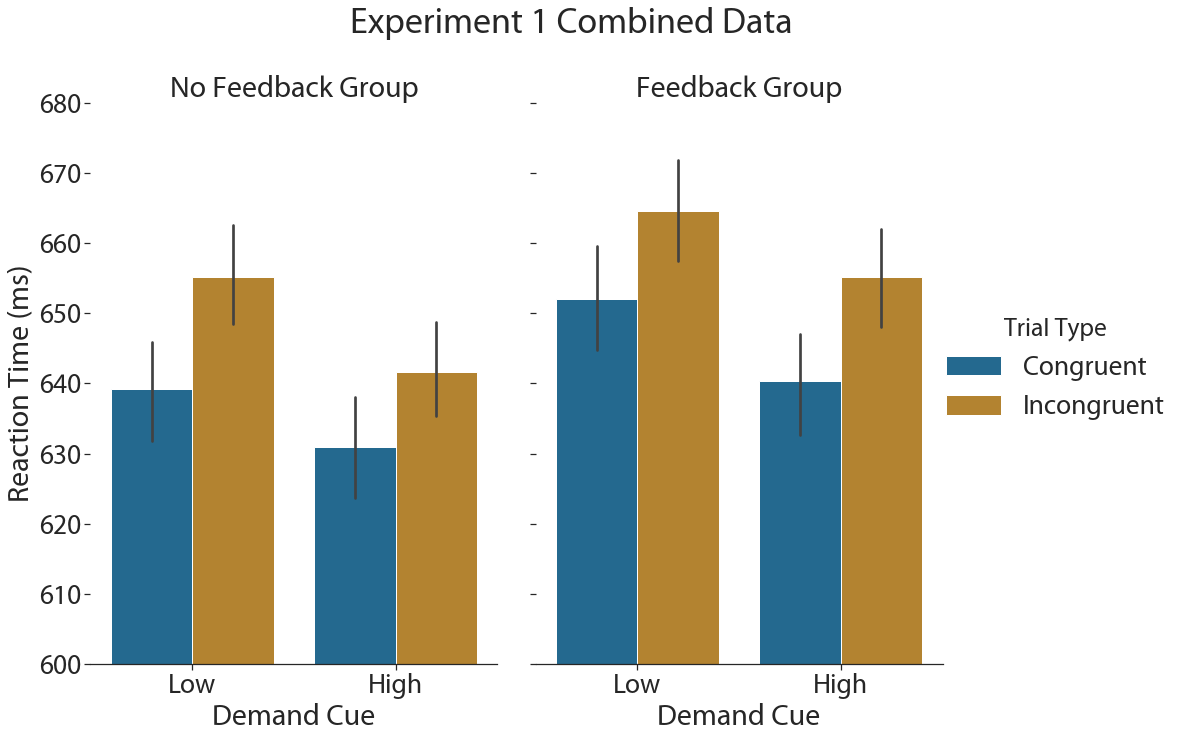

In [18]:
mybargraph("DemandCue","RT","Congruency","Feedback",["Low", "High"],RTmeans,"Demand Cue","Reaction Time (ms)","Experiment 1 Combined Data","Trial Type",600,680,"ISPC_RT_maintask.png",10)

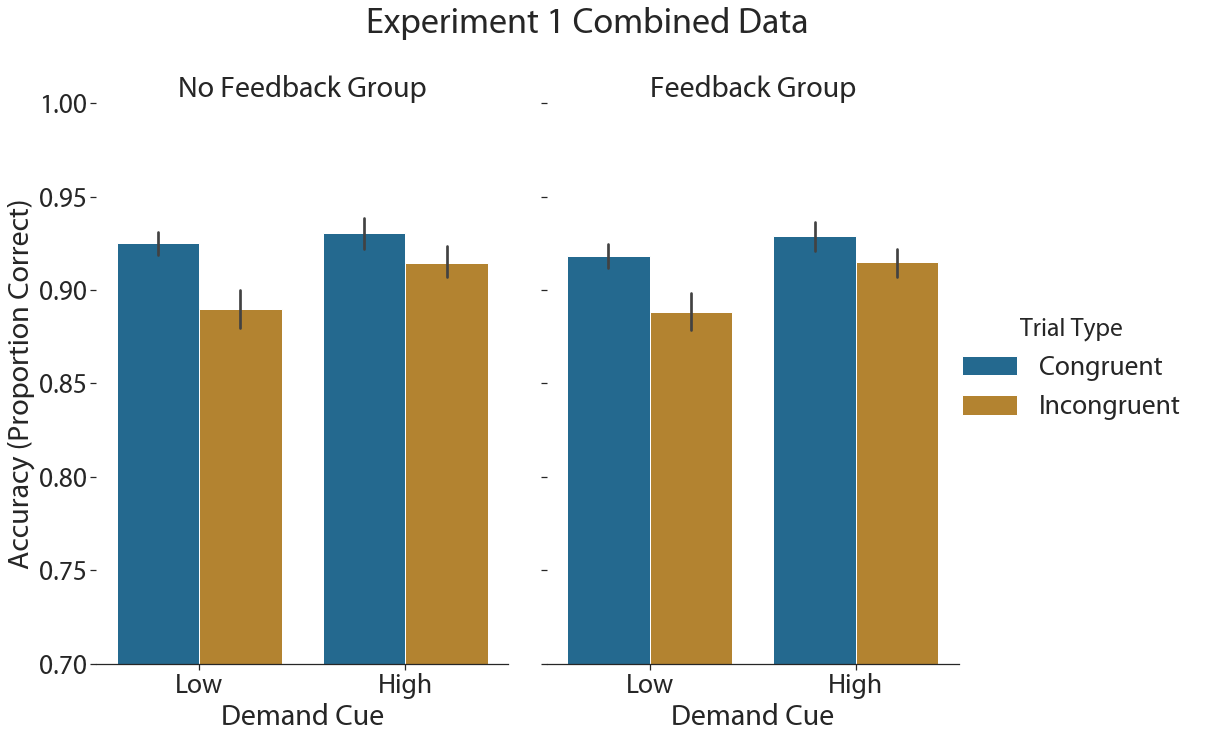

In [19]:
mybargraph("DemandCue","Accuracy","Congruency","Feedback",["Low", "High"],ACCmeans,"Demand Cue","Accuracy (Proportion Correct)","Experiment 1 Combined Data","Trial Type",0.7,1.0,"ISPC_ACC_maintask.png",0.05)

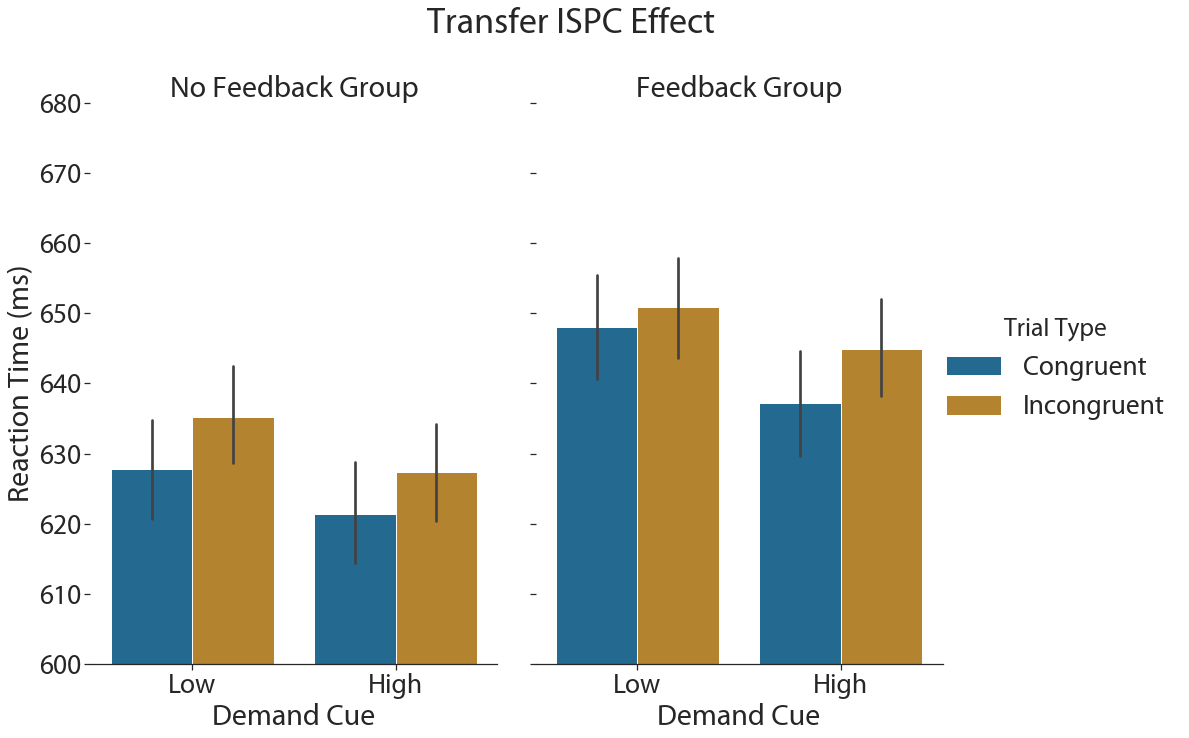

In [20]:
mybargraph("DemandCue","RT","Congruency","Feedback",["Low", "High"],RTmeans_T,"Demand Cue","Reaction Time (ms)","Transfer ISPC Effect","Trial Type",600,680,"ISPC_RT_transfertask.png",10)

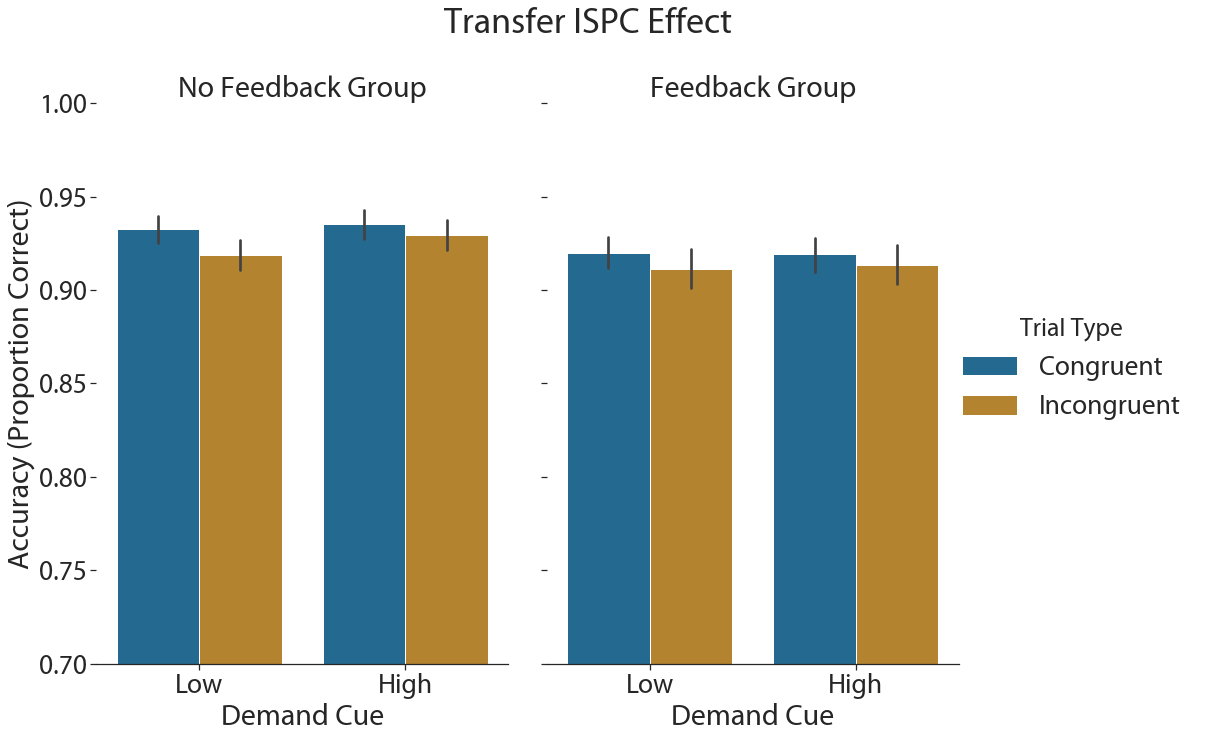

In [21]:
mybargraph("DemandCue","Accuracy","Congruency","Feedback",["Low", "High"],ACCmeans_T,"Demand Cue","Accuracy (Proportion Correct)","Transfer ISPC Effect","Trial Type",0.7,1.0,"ISPC_ACC_transfertask.png",0.05)

# Creating Variables

##### this is to calculate the interaction effects for later correlation graphs, with overall RT/acc in each condition serving as a correction
##### also used to calculate inverse efficiency scores, test RT/acc trade-off

In [22]:
FBsubslim = 180;
NoFBsubslim = 90; #subs 1-90 in the list are no fb grp, while 91-120 are fb

In [23]:
#needed to be outside the function because python wasn't recognizing the dfname as an input when dfname = pd.DataFrame()
FB_RT = pd.DataFrame();
NoFB_RT = pd.DataFrame();
FB_ACC = pd.DataFrame();
NoFB_ACC = pd.DataFrame();

In [24]:
def create_wide_df(df,dfname,dv,Group,lim1,lim2):
    lists = [[] for list in range(0,9)]
    data = df[df.Feedback == Group]
    
    for ID in range(lim1, lim2):
        sub = data[data.subject == ID]
        lists[0].append(ID)
        submain = sub[sub.Transfer == 'MainTask']
        LowC_trials = submain[submain.ContextCong == 'LowC'][dv].mean()
        LowIC_trials = submain[submain.ContextCong == 'LowIC'][dv].mean()
        HighC_trials = submain[submain.ContextCong == 'HighC'][dv].mean()
        HighIC_trials = submain[submain.ContextCong == 'HighIC'][dv].mean()
        subtransfer = sub[sub.Transfer == 'TransferTask']
        LowC_trials_T = subtransfer[subtransfer.ContextCong == 'LowC'][dv].mean()
        LowIC_trials_T = subtransfer[subtransfer.ContextCong == 'LowIC'][dv].mean()
        HighC_trials_T = subtransfer[subtransfer.ContextCong == 'HighC'][dv].mean()
        HighIC_trials_T = subtransfer[subtransfer.ContextCong == 'HighIC'][dv].mean()
        lists[1].append(LowC_trials)
        lists[2].append(LowIC_trials)
        lists[3].append(HighC_trials)
        lists[4].append(HighIC_trials)
        lists[5].append(LowC_trials_T)
        lists[6].append(LowIC_trials_T)
        lists[7].append(HighC_trials_T)
        lists[8].append(HighIC_trials_T)
        
    dfname['SubjectID'] = lists[0]
    dfname['LowC'] = lists[1]
    dfname['LowIC'] = lists[2]
    dfname['HighC'] = lists[3]
    dfname['HighIC'] = lists[4]
    dfname['LowC_T'] = lists[5]
    dfname['LowIC_T'] = lists[6]
    dfname['HighC_T'] = lists[7]
    dfname['HighIC_T'] = lists[8]

In [25]:
create_wide_df(cdat,FB_RT,'RT','Feedback',NoFBsubslim+1,FBsubslim+1);

In [26]:
create_wide_df(cdat,NoFB_RT,'RT','NoFeedback',1,NoFBsubslim+1);

In [27]:
create_wide_df(adat,FB_ACC,'Accuracy','Feedback',(NoFBsubslim+1),(FBsubslim+1));

In [28]:
create_wide_df(adat,NoFB_ACC,'Accuracy','NoFeedback',1,NoFBsubslim+1);

In [29]:
def calc_PCbycong_interaction(df, transfer, RTacc):
    if transfer == 0:
        InteractionEffect = (df.LowIC - df.LowC) - (df.HighIC - df.HighC);
    elif transfer == 1:
        InteractionEffect = (df.LowIC_T - df.LowC_T) - (df.HighIC_T - df.HighC_T);
    
    InteractionEffect = InteractionEffect.reset_index();
    
    if RTacc == 1:
        InteractionEffect.columns = ['index', 'RTs']
    elif RTacc == 0:
        InteractionEffect.columns = ['index', 'ACC']
    
    return InteractionEffect

In [30]:
SC_RT_FB = calc_PCbycong_interaction(FB_RT, 0, 1)

In [31]:
SCT_RT_FB = calc_PCbycong_interaction(FB_RT, 1, 1)

In [32]:
SC_ACC_FB = calc_PCbycong_interaction(FB_ACC, 0, 0)

In [33]:
SCT_ACC_FB = calc_PCbycong_interaction(FB_ACC, 1, 0)

In [34]:
SC_RT_NoFB = calc_PCbycong_interaction(NoFB_RT, 0, 1)

In [35]:
SCT_RT_NoFB = calc_PCbycong_interaction(NoFB_RT, 1, 1)

In [36]:
SC_ACC_NoFB = calc_PCbycong_interaction(NoFB_ACC, 0, 0)

In [37]:
SCT_ACC_NoFB = calc_PCbycong_interaction(NoFB_ACC, 1, 0)

In [38]:
#interaction effects - both groups
SC_RT = SC_RT_NoFB.append(SC_RT_FB)
SC_ACC = SC_ACC_NoFB.append(SC_ACC_FB)
SCT_RT = SCT_RT_NoFB.append(SCT_RT_FB)
SCT_ACC = SCT_ACC_NoFB.append(SCT_ACC_FB)

In [39]:
def means_overall_group(df, filternum, filter1, filter2, dv):
    if filternum == 0:
        X = df.groupby(['subject'])[dv].mean().reset_index();       
    elif filternum == 1:
        X = df.loc[df['Transfer'] == filter1].groupby(['subject'])[dv].mean().reset_index();
    elif filternum == 2:
        X = df.loc[df['Transfer'] == filter1].loc[df['Feedback'] == filter2].groupby(['subject'])[dv].mean().reset_index()
    
    X = X.drop('subject',1)
    
    return X

In [40]:
overallRT = means_overall_group(cdat, 0, 0, 0, 'RT')

In [41]:
overallACC = means_overall_group(adat, 0, 0, 0, 'Accuracy')

In [42]:
overallMainRT = means_overall_group(cdat, 1, 'MainTask', 0, 'RT')

In [43]:
overallMainACC = means_overall_group(adat, 1, 'MainTask', 0, 'Accuracy')

In [44]:
overallRT_T = means_overall_group(cdat, 1, 'TransferTask', 0, 'RT')

In [45]:
overallACC_T = means_overall_group(adat,  1, 'TransferTask', 0, 'Accuracy')

In [46]:
MainRT_FB = means_overall_group(cdat, 2, 'MainTask', 'Feedback', 'RT')

In [47]:
MainACC_FB = means_overall_group(adat, 2, 'MainTask', 'Feedback', 'Accuracy')

In [48]:
RT_FB_T = means_overall_group(cdat, 2, 'TransferTask', 'Feedback', 'RT')

In [49]:
ACC_FB_T = means_overall_group(adat, 2, 'TransferTask', 'Feedback', 'Accuracy')

In [50]:
MainRT_NoFB = means_overall_group(cdat, 2, 'MainTask', 'NoFeedback', 'RT')

In [51]:
MainACC_NoFB = means_overall_group(adat, 2, 'MainTask', 'NoFeedback', 'Accuracy')

In [52]:
RT_NoFB_T = means_overall_group(cdat, 2, 'TransferTask', 'NoFeedback', 'RT')

In [53]:
ACC_NoFB_T = means_overall_group(adat, 2, 'TransferTask', 'NoFeedback', 'Accuracy')

Now are there RT/ACC trade-offs?

In [60]:
#main task
stats.linregress(overallRT.RT,overallACC.Accuracy)

LinregressResult(slope=-0.0004743586534608242, intercept=1.223180767980271, rvalue=-0.48901378119877004, pvalue=3.279707158852333e-12, stderr=6.342050273707847e-05)

In [61]:
#transfer task
stats.linregress(overallRT_T.RT,overallACC_T.Accuracy)

LinregressResult(slope=-0.0004446912934522155, intercept=1.2053680008814747, rvalue=-0.40283298437720216, pvalue=2.0671735633693286e-08, stderr=7.57311395321782e-05)

In [62]:
#main task w/in no FB group
stats.linregress(MainRT_NoFB.RT,MainACC_NoFB.Accuracy)

LinregressResult(slope=-0.0005395931549956067, intercept=1.2631708805384863, rvalue=-0.5162780643605362, pvalue=1.903953476048376e-07, stderr=9.541765514460388e-05)

In [63]:
#transfer task w/in no FB group
stats.linregress(RT_NoFB_T.RT,ACC_NoFB_T.Accuracy)

LinregressResult(slope=-0.00042291248391391925, intercept=1.1943568316819613, rvalue=-0.42596570643742143, pvalue=2.8416204342201983e-05, stderr=9.575423535291251e-05)

In [64]:
#main task w/in FB group
stats.linregress(MainRT_FB.RT,MainACC_FB.Accuracy)

LinregressResult(slope=-0.0004460693870082642, intercept=1.2059469694390637, rvalue=-0.44500170885049245, pvalue=1.1101694734997146e-05, stderr=9.56928320644892e-05)

In [65]:
#transfer task w/in FB group
stats.linregress(RT_FB_T.RT,ACC_FB_T.Accuracy)

LinregressResult(slope=-0.00045358445976276, intercept=1.2084440753885684, rvalue=-0.3783712624748827, pvalue=0.00023593217002256428, stderr=0.00011828980976798641)

# What about Inverse Efficiency, given the RT/ACC trade-off?

Inverse Efficiency is another metric that shows whether someone is more efficient at responding, not just faster (i.e., it doesn't come with a cost in accuracy). To calculate inverse efficiency, we take the mean RT in each condition and divide it by the mean Accuracy (Proportion Correct) in each condition, for each subject. This gives us an RT corrected for accuracy.

In [66]:
IE_FB = pd.DataFrame()
IE_NoFB = pd.DataFrame()
IE_all = pd.DataFrame()

IE_FB_T = pd.DataFrame()
IE_NoFB_T = pd.DataFrame()
IE_all_T = pd.DataFrame()

In [67]:
def inverse_efficiency_calc(df1, df2, Group, Transfer, dfname):
    #rt is df1 and proportion correct has to be df2
    lists = [[] for list in range(0,9)]
    
    for ID in range(0,len(df1)):
        sub = df1.SubjectID[ID]
        lists[0].append(sub)
        IE_LowC = df1.LowC[ID] / df2.LowC[ID]
        IE_LowIC = df1.LowIC[ID] / df2.LowIC[ID]
        IE_HighC = df1.HighC[ID] / df2.HighC[ID]
        IE_HighIC = df1.HighIC[ID] / df2.HighIC[ID]
        IE_LowC_T = df1.LowC_T[ID] / df2.LowC_T[ID]
        IE_LowIC_T = df1.LowIC_T[ID] / df2.LowIC_T[ID]
        IE_HighC_T = df1.HighC_T[ID] / df2.HighC_T[ID]
        IE_HighIC_T = df1.HighIC_T[ID] / df2.HighIC_T[ID]
        ISPC_Main = (IE_LowIC - IE_LowC) - (IE_HighIC - IE_HighC)
        ISPC_T = (IE_LowIC_T - IE_LowC_T) - (IE_HighIC_T - IE_HighC_T)
        avgIEtotal = (IE_LowC + IE_LowIC + IE_HighC + IE_HighIC) / 4
        avgIEtotal_T = (IE_LowC_T + IE_LowIC_T + IE_HighC_T + IE_HighIC_T) / 4
        
        if Transfer == 0:
            lists[1].append(IE_LowC)
            lists[2].append(IE_LowIC)
            lists[3].append(IE_HighC)
            lists[4].append(IE_HighIC)
            lists[5].append(ISPC_Main)
            lists[6].append(avgIEtotal)
        elif Transfer == 1:
            lists[1].append(IE_LowC_T)
            lists[2].append(IE_LowIC_T)
            lists[3].append(IE_HighC_T)
            lists[4].append(IE_HighIC_T)
            lists[5].append(ISPC_T)
            lists[6].append(avgIEtotal_T)
        
        lists[7].append(Group)
        
        if ID < 30:
            lists[8].append(0)
        elif ID in range(30,90):
            lists[8].append(1)
        elif ID in range(90,120):
            lists[8].append(0)
        elif ID in range(120,180):
            lists[8].append(1)
        
    dfname['SubjectID'] = lists[0]
    dfname['C1_1'] = lists[1]
    dfname['C1_2'] = lists[2]
    dfname['C2_1'] = lists[3]
    dfname['C2_2'] = lists[4]
    dfname['Effect'] = lists[5]
    dfname['OverallIE'] = lists[6]
    dfname['Feedback'] = lists[7]
    dfname['Experiment'] = lists[8]

In [68]:
inverse_efficiency_calc(FB_RT, FB_ACC, "Feedback", 0, IE_FB)

In [69]:
inverse_efficiency_calc(NoFB_RT, NoFB_ACC, "NoFeedback", 0, IE_NoFB)

In [70]:
inverse_efficiency_calc(FB_RT, FB_ACC, "Feedback", 1, IE_FB_T)

In [71]:
inverse_efficiency_calc(NoFB_RT, NoFB_ACC, "NoFeedback", 1, IE_NoFB_T)

In [72]:
IE_all = IE_NoFB.append(IE_FB)
IE_all_T = IE_NoFB_T.append(IE_FB_T)

In [73]:
def change_to_longform(df):
    X = pd.wide_to_long(df,['C1', 'C2'],i=["SubjectID", "Effect", "OverallIE", "Feedback", "Experiment"],j="Congruency",sep='_',suffix='\w')
    X = X.reset_index()
    X = pd.wide_to_long(X,['C'],i=["SubjectID","Effect", "OverallIE", "Feedback", "Experiment", "Congruency"],j="DemandCue")
    X = X.reset_index()
    X.columns = ['SubjectID', "Effect", "OverallIE", 'Feedback', "Experiment", 'Congruency', 'DemandCue', 'IE'];
    return X

In [74]:
IE_all = change_to_longform(IE_all)

In [75]:
IE_all_T = change_to_longform(IE_all_T)

In [76]:
#wide_to_long wasn't working if there were strings involved, so I used numbers for the levels and I'm renaming here
dflist = [IE_all, IE_all_T]

for df in dflist:
    df['TrialType'] = df['Congruency'].isin([1,2])
    df.loc[df['Congruency'].isin([1]),'TrialType'] = 'Congruent'
    df.loc[df['Congruency'].isin([2]),'TrialType'] = 'Incongruent'
    
    df['CueType'] = df['DemandCue'].isin([1,2])
    df.loc[df['DemandCue'].isin([1]),'CueType'] = 'Low'
    df.loc[df['DemandCue'].isin([2]),'CueType'] = 'High'

In [77]:
avgIEmain = pd.DataFrame()

for ID in range(1,181):
    avgIE = IE_all.loc[IE_all.SubjectID == ID]
    tmpIE = avgIE.groupby(['SubjectID', "OverallIE", "Feedback", "Experiment"])['Effect'].mean().reset_index()
    avgIEmain = avgIEmain.append(tmpIE)

In [78]:
avgIE_T = pd.DataFrame()

for ID in range(1,181):
    avgIET = IE_all_T.loc[IE_all_T.SubjectID == ID]
    tmpIET = avgIET.groupby(['SubjectID', "OverallIE", "Feedback", "Experiment"])['Effect'].mean().reset_index()
    avgIE_T = avgIE_T.append(tmpIET)

In [74]:
IE_all.to_csv(csvpath+'IE_Main.csv');
IE_all_T.to_csv(csvpath+'IE_transfer.csv');

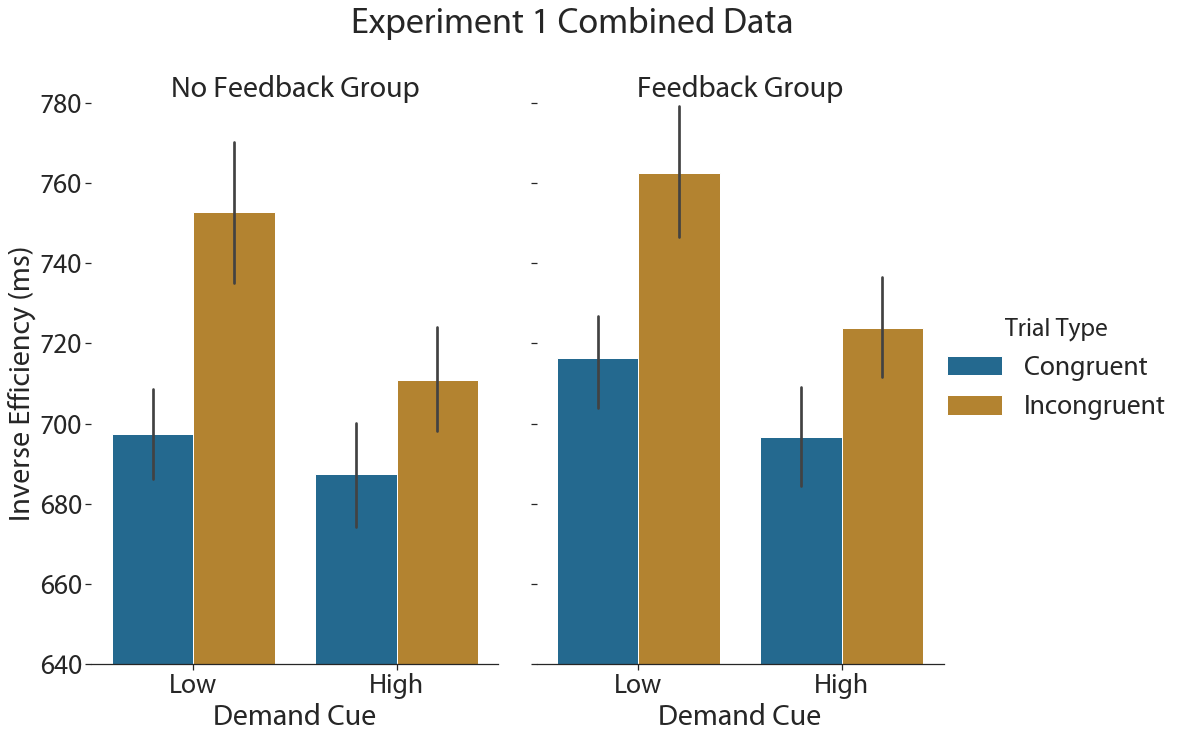

In [80]:
mybargraph("CueType","IE","TrialType","Feedback",["Low", "High"],IE_all,"Demand Cue","Inverse Efficiency (ms)","Experiment 1 Combined Data","Trial Type",640,780,"ISPC_IE_maintask.png",20)

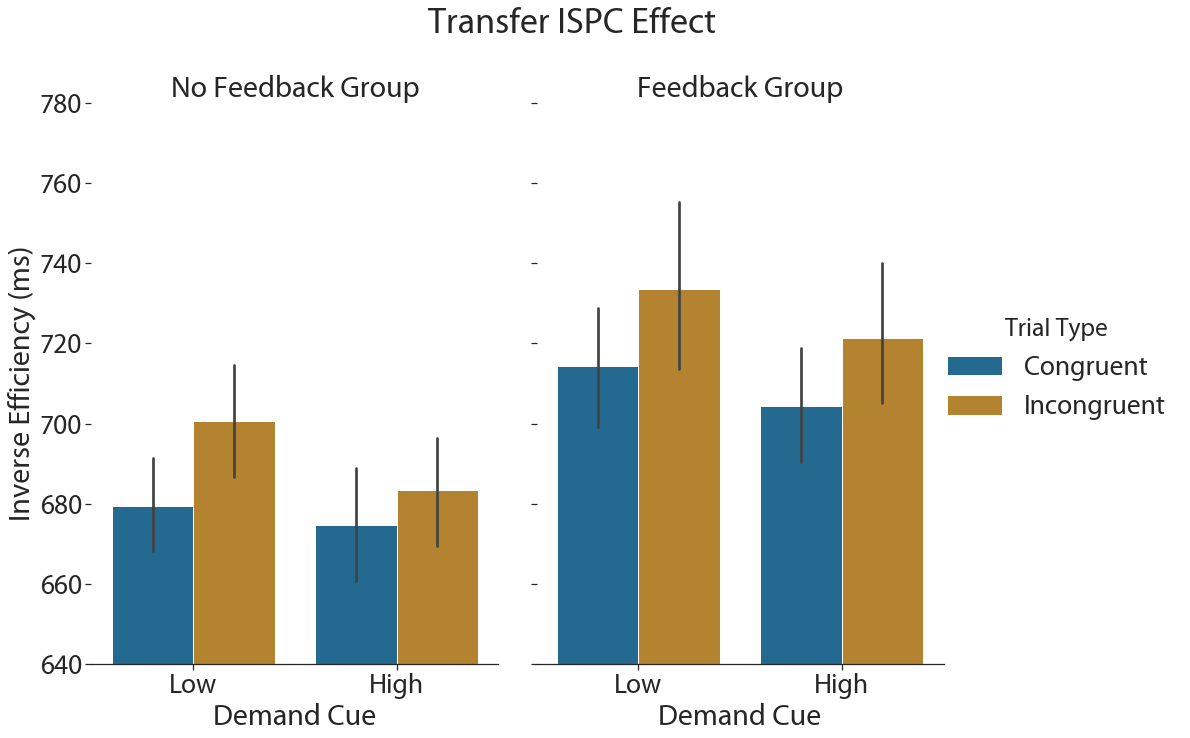

In [81]:
mybargraph("CueType","IE","TrialType","Feedback",["Low", "High"],IE_all_T,"Demand Cue","Inverse Efficiency (ms)","Transfer ISPC Effect","Trial Type",640,780,"ISPC_IE_transfertask.png",20)

In [82]:
%%writefile IE_Anova.R

install.packages("afex",repos='https://mirrors.nics.utk.edu/cran/')
library(afex)

rawIEData <- read.csv('IE_Main.csv')
aov_car(IE ~ Feedback * Experiment + Error(subject/(Congruency*DemandCue)), data = rawIEData, anova_table = list(es = "pes"))

#

rawIEData_T <- read.csv('IE_transfer.csv')
aov_car(IE ~ Feedback * Experiment + Error(subject/(Congruency*DemandCue)), data = rawIEData_T, anova_table = list(es = "pes"))

Overwriting IE_Anova.R


In [78]:
! Rscript IE_Anova.R

Warning message:
package 'afex' is not available (for R version 3.4.3) 
Error in library(afex) : there is no package called 'afex'
Execution halted


There is an interaction between cue & congruency for inverse efficiency for the main task, but not the transfer task. So that suggests that feedback has little influence on a standard ISPC effect, which we are replicating in both the No Feedback and Feedback groups. This is now with N = 180.

### Is there a correlation between the main ISPC effect and the transfer effect?

In Bugg and Dey (2018), this correlation was fairly small and observed when the N was large (i.e., across many expts). We may not see anything "stable" here for the No Feedback group (more comparable to Bugg and Dey, 2018), because our sample size is relatively small. Note that this is just an exploratory analysis that I was curious about, given the lack of a group-level transfer effect (e.g., if not observed at the group-level, are there individual differences?).

In [83]:
def my_corr_graphs(x, y, ylabel, xlabel, figname, selectsubs, corrxvalue, corryvalue):
    sns.jointplot(x=x, y=y, kind="reg", height=11, ratio=2, color = 'g');
    plt.ylabel(ylabel, fontweight="bold");
    plt.xlabel(xlabel, fontweight="bold");
    plb.savefig(figurepath+figname, dpi = 300)
    regstat = stats.linregress(x,y)
    
    if selectsubs == 1:
        corrx = x/corrxvalue
        corry = y/corryvalue
    else:
        corrx = x.reset_index(drop=True)/corrxvalue
        corry = y.reset_index(drop=True)/corryvalue
        
    corrstat = stats.linregress(corrx,corry)
    return regstat, corrstat

INVERSE EFFICIENCY

for the feedback group...?

(LinregressResult(slope=0.04211508432559918, intercept=1.3859270994719624, rvalue=0.030319197389753763, pvalue=0.7766573783386599, stderr=0.14800586752495082),
 LinregressResult(slope=0.15100807281301087, intercept=-0.0029474065025567415, rvalue=0.12664634990873944, pvalue=0.23425302040571588, stderr=0.12608256295445447))

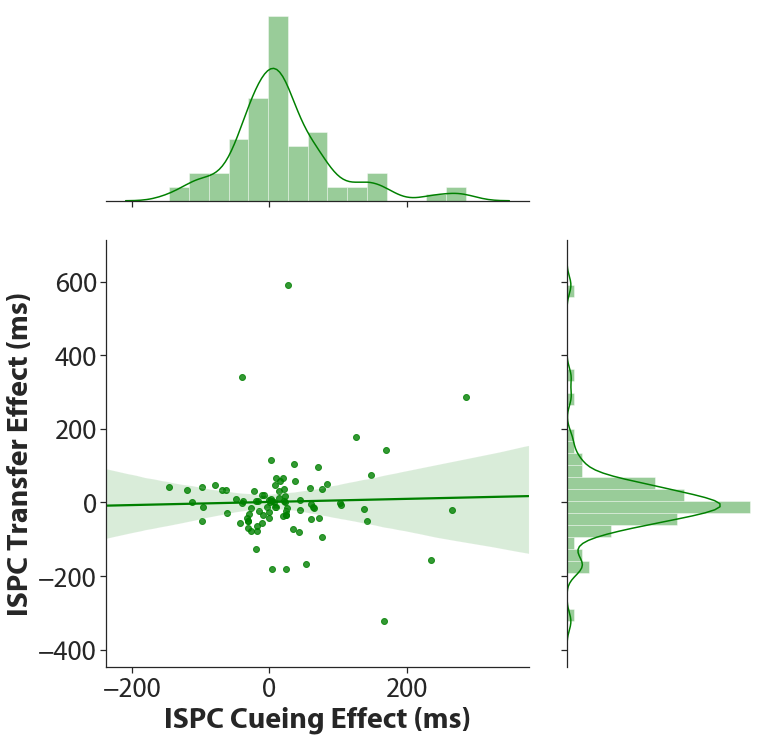

In [84]:
my_corr_graphs(avgIEmain.loc[avgIEmain.Feedback=="Feedback"].Effect, avgIE_T.loc[avgIE_T.Feedback=="Feedback"].Effect, 'ISPC Transfer Effect (ms)', 'ISPC Cueing Effect (ms)', "SC_SCT_All_IE_FB.png", 1, avgIEmain.loc[avgIEmain.Feedback=="Feedback"].OverallIE, avgIE_T.loc[avgIE_T.Feedback=="Feedback"].OverallIE)

for the no feedback group...?

(LinregressResult(slope=-0.029749779481297322, intercept=13.182049925215962, rvalue=-0.027304036973689272, pvalue=0.7983712084647798, stderr=0.11610571720943805),
 LinregressResult(slope=0.004214148428401893, intercept=0.012012979828662444, rvalue=0.004183118555700557, pvalue=0.9687867572072807, stderr=0.10739016727932994))

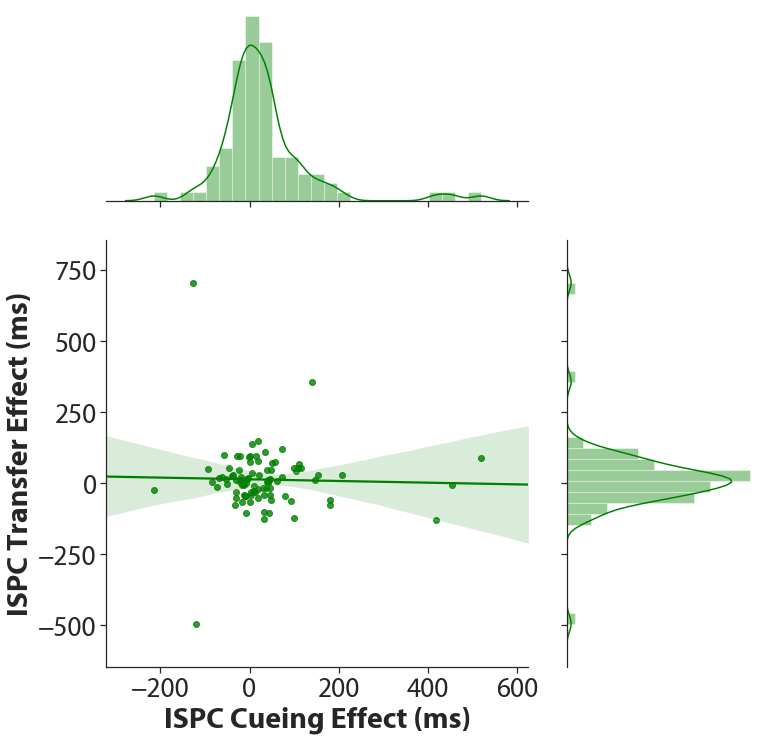

In [85]:
my_corr_graphs(avgIEmain.loc[avgIEmain.Feedback=="NoFeedback"].Effect, avgIE_T.loc[avgIE_T.Feedback=="NoFeedback"].Effect, 'ISPC Transfer Effect (ms)', 'ISPC Cueing Effect (ms)', "SC_SCT_All_IE_NoFB.png", 1, avgIEmain.loc[avgIEmain.Feedback=="NoFeedback"].OverallIE, avgIE_T.loc[avgIE_T.Feedback=="NoFeedback"].OverallIE)

for all subjects...?

(LinregressResult(slope=-0.0013361327507662784, intercept=7.241755339577452, rvalue=-0.0011150496576052067, pvalue=0.988147267819828, stderr=0.08981422558086781),
 LinregressResult(slope=0.06180018415200107, intercept=0.004382727078527653, rvalue=0.05738739271727549, pvalue=0.44415267011344306, stderr=0.08058365473573671))

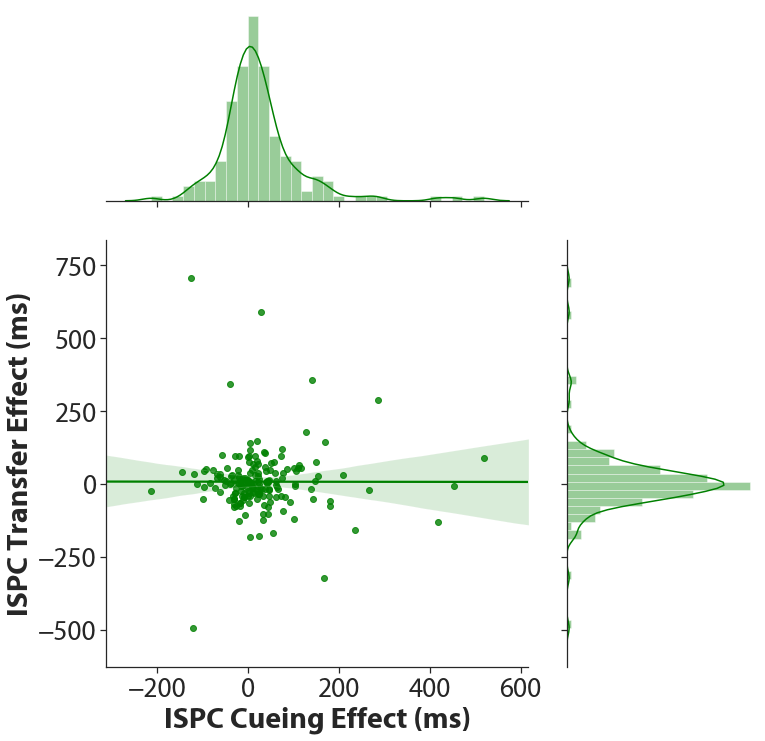

In [86]:
my_corr_graphs(avgIEmain.Effect, avgIE_T.Effect, 'ISPC Transfer Effect (ms)', 'ISPC Cueing Effect (ms)', "SC_SCT_All_IE.png", 1, avgIEmain.OverallIE, avgIE_T.OverallIE)

REACTION TIME

for the feedback group...?

(LinregressResult(slope=0.29965830910680585, intercept=-4.19458602801419, rvalue=0.24849818714294383, pvalue=0.018192314176654102, stderr=0.12451473196531009),
 LinregressResult(slope=0.31167713524760104, intercept=-0.0058204188895925124, rvalue=0.2658959540192648, pvalue=0.011308316106504268, stderr=0.12045634828871023))

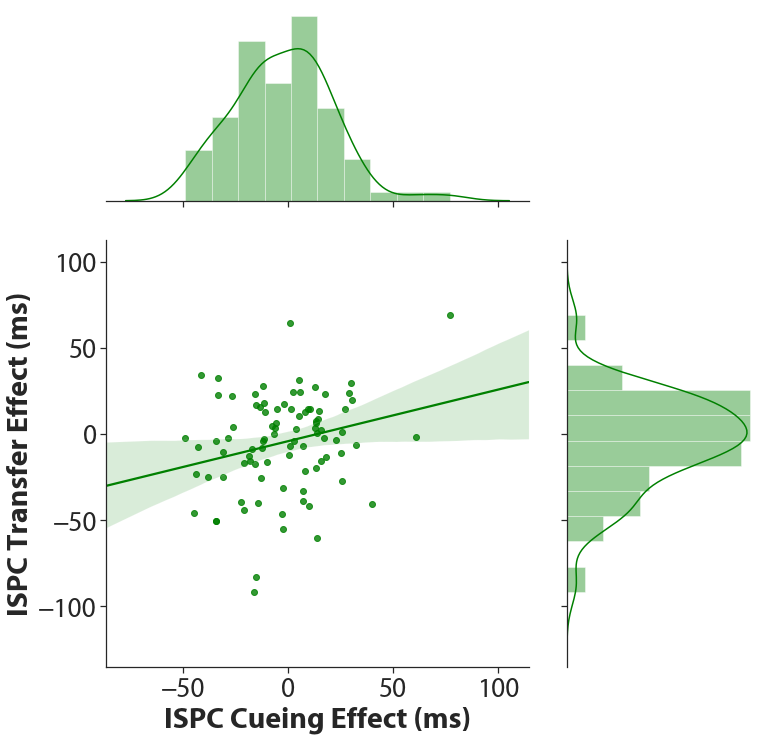

In [87]:
my_corr_graphs(SC_RT_FB.RTs, SCT_RT_FB.RTs, 'ISPC Transfer Effect (ms)', 'ISPC Cueing Effect (ms)', "SC_SCT_FB.png", 1, MainRT_FB.RT, RT_FB_T.RT)

for the no feedback group...?

(LinregressResult(slope=0.22283853702219641, intercept=0.3545536448068092, rvalue=0.19135857648980337, pvalue=0.07080186161324335, stderr=0.12184291231924231),
 LinregressResult(slope=0.2516528957260064, intercept=5.18329149024185e-06, rvalue=0.2062699174903739, pvalue=0.051113575407105705, stderr=0.12725749498490513))

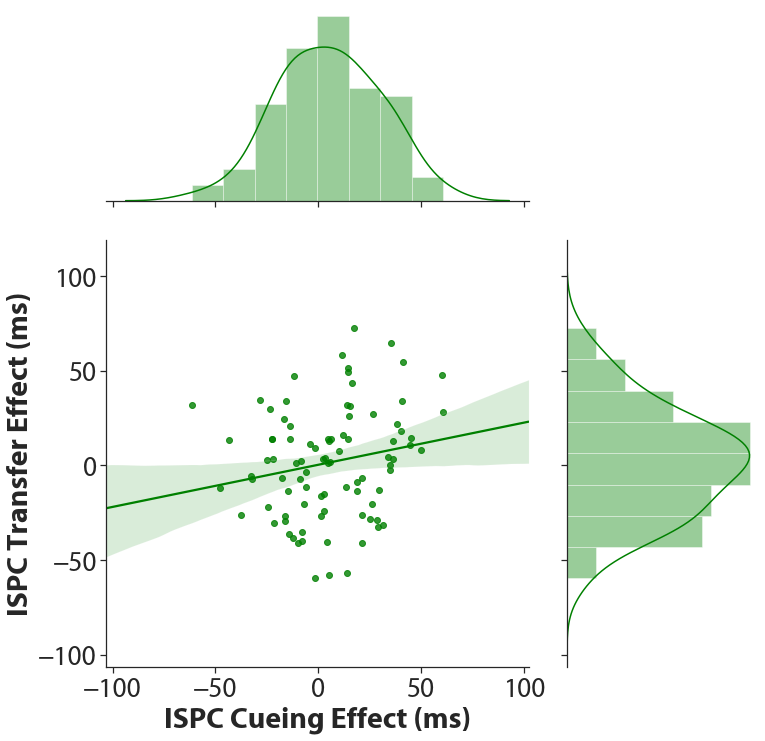

In [88]:
my_corr_graphs(SC_RT_NoFB.RTs, SCT_RT_NoFB.RTs, 'ISPC Transfer Effect (ms)', 'ISPC Cueing Effect (ms)', "SC_SCT_NoFB.png", 1, MainRT_NoFB.RT, RT_NoFB_T.RT)

across all subjects...?

(LinregressResult(slope=0.27323871516393383, intercept=-2.0837705042316346, rvalue=0.23219547050884834, pvalue=0.001709734099623814, stderr=0.08579137504655356),
 LinregressResult(slope=0.29123192196081155, intercept=-0.003110254273306546, rvalue=0.2448698161924153, pvalue=0.0009231110933186193, stderr=0.08643041602117231))

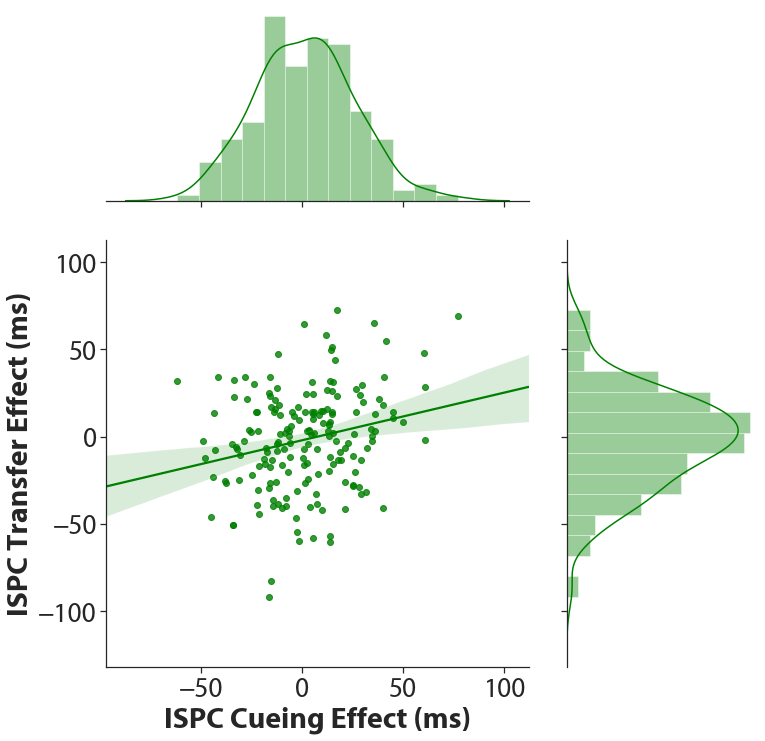

In [89]:
my_corr_graphs(SC_RT.RTs, SCT_RT.RTs, 'ISPC Transfer Effect (ms)', 'ISPC Cueing Effect (ms)', "SC_SCT_All.png", 0, overallMainRT.RT, overallRT_T.RT)

So, there is some hint of a correlation between the cueing & transfer effects for RT, consistent with Bugg & Dey (2018). Correlations tend to stabilize around 200-250 observations, and we have 180 subjects here. Bugg & Dey also had ~250 subjects and found the correlation, so I tend to believe that this small correlation has stabilized and explains a small part of the variance in the data.

#### What about for accuracy?

... for the feedback group?

(LinregressResult(slope=0.05017003771191456, intercept=-0.0017669839107112787, rvalue=0.04299834439004705, pvalue=0.6873880224276909, stderr=0.12426519671866476),
 LinregressResult(slope=0.0278239739519839, intercept=-0.0029878118556344833, rvalue=0.022803789854638424, pvalue=0.8310622218696764, stderr=0.130034275747456))

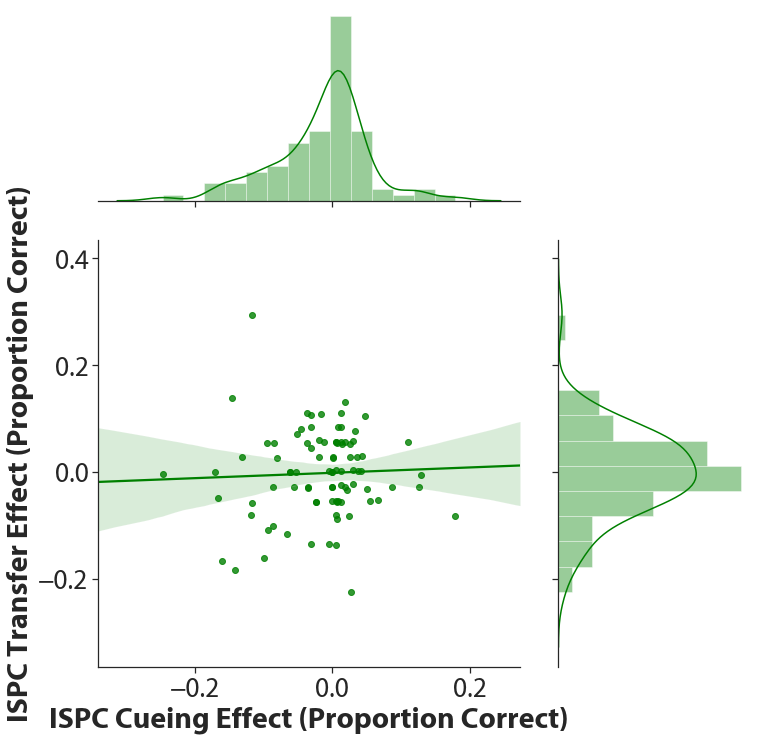

In [90]:
my_corr_graphs(SC_ACC_FB.ACC, SCT_ACC_FB.ACC, 'ISPC Transfer Effect (Proportion Correct)', 'ISPC Cueing Effect (Proportion Correct)', "SC_SCT_FB_ACC.png", 1, MainACC_FB.Accuracy, ACC_FB_T.Accuracy)

...for the no feedback group?

(LinregressResult(slope=0.009736628767261321, intercept=-0.008201438726133497, rvalue=0.008811239062844435, pvalue=0.9343096563400742, stderr=0.11779135880353137),
 LinregressResult(slope=-0.01593005569763252, intercept=-0.01062583155297363, rvalue=-0.013655401889229325, pvalue=0.8983534740417769, stderr=0.12434575873853868))

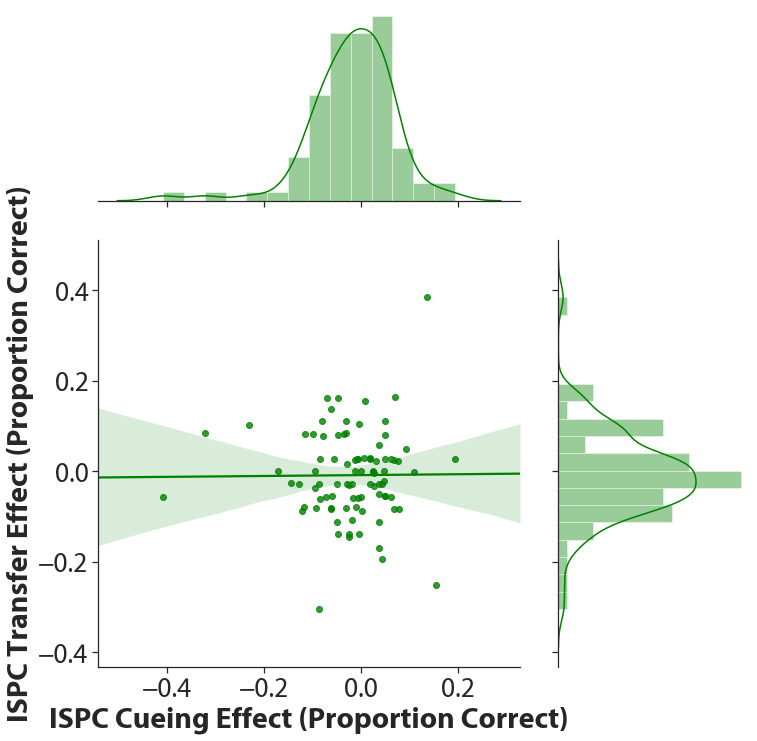

In [91]:
my_corr_graphs(SC_ACC_NoFB.ACC, SCT_ACC_NoFB.ACC, 'ISPC Transfer Effect (Proportion Correct)', 'ISPC Cueing Effect (Proportion Correct)', "SC_SCT_NoFB_ACC.png", 1, MainACC_NoFB.Accuracy, ACC_NoFB_T.Accuracy)

...across all subjects?

(LinregressResult(slope=0.02571231943889526, intercept=-0.0050300750845345115, rvalue=0.022768999434136378, pvalue=0.7615931709618488, stderr=0.08462032777484768),
 LinregressResult(slope=0.0011611026710464383, intercept=-0.006870235927166061, rvalue=0.0009778627530296143, pvalue=0.9896054468465683, stderr=0.0889984639809054))

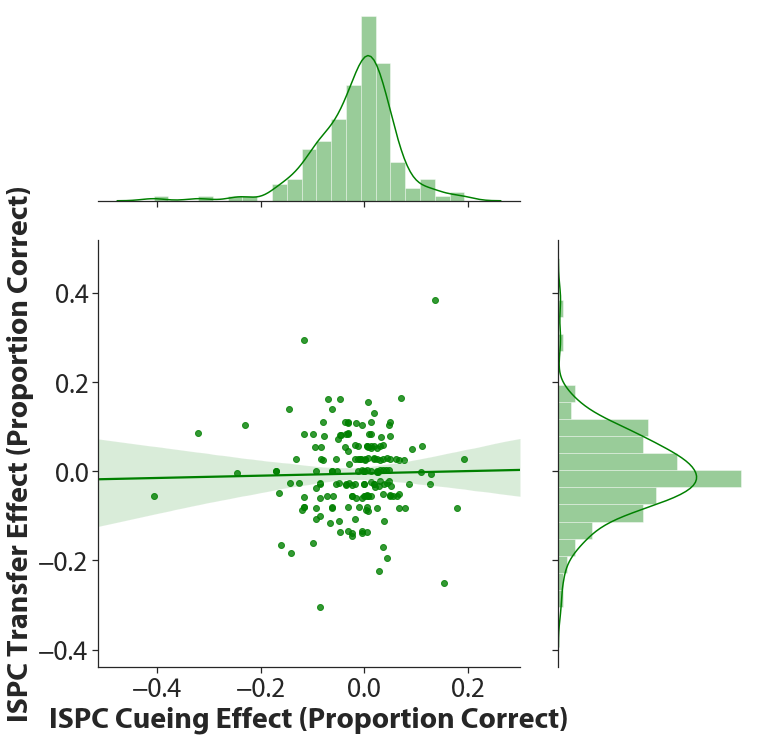

In [92]:
my_corr_graphs(SC_ACC.ACC, SCT_ACC.ACC, 'ISPC Transfer Effect (Proportion Correct)', 'ISPC Cueing Effect (Proportion Correct)', "SC_SCT_All_ACC.png", 0, overallMainACC.Accuracy, overallACC_T.Accuracy)

# Making Supplementary Tables with 95% Confidence Intervals

Now I'm making the Supplementary tables that show our data in full, with 95% CIs accompanying the means.

In [93]:
import scipy.stats
from pandas.plotting import table

#credit for simplifying code here: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, acc, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    
    #adding a rounded for the sake of the table
    if acc == 0:
        mrounded = np.round(m); lowerci = np.round(m-h); upperci = np.round(m+h)
    elif acc == 1: #can't fully round proportion correct, else it goes to 1.0!
        mrounded = np.round(m,decimals=2); lowerci = np.round(m-h,decimals=2); upperci = np.round(m+h, decimals=2)
    #return m, m-h, m+h
    return mrounded, [lowerci, upperci]

In [94]:
def ci_effects(df, dv, Filter1, Filter2, Context):
    if Context == 1:
        sub_means = df.loc[df['Feedback']==Filter1].loc[df['Transfer']==Filter2].groupby(['subject','ContextCong'])[dv].mean().reset_index()
    elif Context == 2:
        sub_means = df.loc[df['Feedback']==Filter1].loc[df['Transfer']==Filter2].groupby(['subject','RunCounter','ContextCong'])[dv].mean().reset_index()
   
    return sub_means

In [95]:
def make_ci_table(df, dv, Filter1, Filter2, Filter3, Context, Context2, RTacc, tablename):
    
    x = ci_effects(df, dv, Filter1, Filter2, Context);
    overall_MIC_IC = mean_confidence_interval(x.loc[x['ContextCong'] == 'HighIC'][dv],RTacc)
    overall_MIC_C = mean_confidence_interval(x.loc[x['ContextCong'] == 'HighC'][dv],RTacc)
    overall_MC_IC = mean_confidence_interval(x.loc[x['ContextCong'] == 'LowIC'][dv],RTacc)
    overall_MC_C = mean_confidence_interval(x.loc[x['ContextCong'] == 'LowC'][dv],RTacc)
    
    x1 = ci_effects(df, dv, Filter1, Filter2, Context2);
    r1_MIC_IC = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'HighIC'].loc[x1['RunCounter'] == 1][dv],RTacc)
    r1_MIC_C = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'HighC'].loc[x1['RunCounter'] == 1][dv],RTacc)
    r1_MC_IC = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'LowIC'].loc[x1['RunCounter'] == 1][dv],RTacc)
    r1_MC_C = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'LowC'].loc[x1['RunCounter'] == 1][dv],RTacc)

    r2_MIC_IC = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'HighIC'].loc[x1['RunCounter'] == 2][dv],RTacc)
    r2_MIC_C = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'HighC'].loc[x1['RunCounter'] == 2][dv],RTacc)
    r2_MC_IC = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'LowIC'].loc[x1['RunCounter'] == 2][dv],RTacc)
    r2_MC_C = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'LowC'].loc[x1['RunCounter'] == 2][dv],RTacc)

    r3_MIC_IC = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'HighIC'].loc[x1['RunCounter'] == 3][dv],RTacc)
    r3_MIC_C = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'HighC'].loc[x1['RunCounter'] == 3][dv],RTacc)
    r3_MC_IC = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'LowIC'].loc[x1['RunCounter'] == 3][dv],RTacc)
    r3_MC_C = mean_confidence_interval(x1.loc[x1['ContextCong'] == 'LowC'].loc[x1['RunCounter'] == 3][dv],RTacc)

    x2 = ci_effects(df, dv, Filter1, Filter3, Context);
    r4_MIC_IC = mean_confidence_interval(x2.loc[x2['ContextCong'] == 'HighIC'][dv],RTacc)
    r4_MIC_C = mean_confidence_interval(x2.loc[x2['ContextCong'] == 'HighC'][dv],RTacc)
    r4_MC_IC = mean_confidence_interval(x2.loc[x2['ContextCong'] == 'LowIC'][dv],RTacc)
    r4_MC_C = mean_confidence_interval(x2.loc[x2['ContextCong'] == 'LowC'][dv],RTacc)
    
    MyTable = pd.DataFrame({'Context.TrialType': ['MC.C', 'MC.IC', 'MIC.C', 'MIC.IC'],
                     'Run 1 (Main)': [r1_MC_C, r1_MC_IC, r1_MIC_C, r1_MIC_IC],
                     'Run 2 (Main)': [r2_MC_C, r2_MC_IC, r2_MIC_C, r2_MIC_IC],
                     'Run 3 (Main)': [r3_MC_C, r3_MC_IC, r3_MIC_C, r3_MIC_IC],
                     'Overall (Main)': [overall_MC_C, overall_MC_IC, overall_MIC_C, overall_MIC_IC],
                     'Run 4 (Transfer)': [r4_MC_C, r4_MC_IC, r4_MIC_C, r4_MIC_IC]})

    MyTable.to_csv(csvpath+tablename)
    return MyTable

First, let's look at the typical ISPC paradigm group.

In [96]:
make_ci_table(cdat, 'RT', 'NoFeedback', 'MainTask', 'TransferTask', 1, 2, 0, 'NoFBSupplementaryTable1.csv')

,Context.TrialType,Run 1 (Main),Run 2 (Main),Run 3 (Main),Overall (Main),Run 4 (Transfer)
0,MC.C,"(643.0, [629.0, 657.0])","(635.0, [621.0, 650.0])","(640.0, [625.0, 654.0])","(639.0, [625.0, 653.0])","(628.0, [614.0, 642.0])"
1,MC.IC,"(664.0, [649.0, 678.0])","(654.0, [639.0, 669.0])","(649.0, [634.0, 663.0])","(655.0, [641.0, 669.0])","(635.0, [621.0, 649.0])"
2,MIC.C,"(638.0, [622.0, 654.0])","(624.0, [610.0, 639.0])","(631.0, [618.0, 645.0])","(631.0, [617.0, 645.0])","(621.0, [607.0, 636.0])"
3,MIC.IC,"(649.0, [634.0, 663.0])","(636.0, [622.0, 650.0])","(641.0, [628.0, 655.0])","(642.0, [628.0, 655.0])","(627.0, [614.0, 641.0])"


And now what about the feedback group for RT?

In [97]:
make_ci_table(cdat, 'RT', 'Feedback', 'MainTask', 'TransferTask', 1, 2, 0, 'FBSupplementaryTable2.csv')

,Context.TrialType,Run 1 (Main),Run 2 (Main),Run 3 (Main),Overall (Main),Run 4 (Transfer)
0,MC.C,"(659.0, [643.0, 675.0])","(649.0, [635.0, 664.0])","(649.0, [634.0, 664.0])","(652.0, [637.0, 667.0])","(648.0, [632.0, 664.0])"
1,MC.IC,"(672.0, [656.0, 688.0])","(664.0, [649.0, 679.0])","(660.0, [645.0, 675.0])","(665.0, [650.0, 679.0])","(651.0, [636.0, 666.0])"
2,MIC.C,"(647.0, [632.0, 663.0])","(636.0, [621.0, 650.0])","(638.0, [624.0, 653.0])","(640.0, [626.0, 654.0])","(637.0, [622.0, 652.0])"
3,MIC.IC,"(663.0, [647.0, 678.0])","(652.0, [637.0, 666.0])","(652.0, [638.0, 667.0])","(655.0, [641.0, 669.0])","(645.0, [630.0, 660.0])"


And for Accuracy, first for the typical ISPC group...

In [98]:
make_ci_table(adat, 'Accuracy', 'NoFeedback', 'MainTask', 'TransferTask', 1, 2, 1, 'NoFB_ACC_SupplementaryTable3.csv')

,Context.TrialType,Run 1 (Main),Run 2 (Main),Run 3 (Main),Overall (Main),Run 4 (Transfer)
0,MC.C,"(0.92, [0.9, 0.94])","(0.93, [0.91, 0.94])","(0.93, [0.92, 0.94])","(0.93, [0.91, 0.94])","(0.93, [0.92, 0.95])"
1,MC.IC,"(0.88, [0.85, 0.91])","(0.89, [0.87, 0.92])","(0.9, [0.88, 0.92])","(0.89, [0.87, 0.91])","(0.92, [0.9, 0.93])"
2,MIC.C,"(0.92, [0.9, 0.94])","(0.93, [0.9, 0.95])","(0.94, [0.93, 0.96])","(0.93, [0.91, 0.95])","(0.94, [0.92, 0.95])"
3,MIC.IC,"(0.9, [0.87, 0.92])","(0.92, [0.89, 0.94])","(0.93, [0.91, 0.95])","(0.91, [0.9, 0.93])","(0.93, [0.91, 0.95])"


And now for the feedback group...

In [99]:
make_ci_table(adat, 'Accuracy', 'Feedback', 'MainTask', 'TransferTask', 1, 2, 1, 'FB_ACC_SupplementaryTable4.csv')

,Context.TrialType,Run 1 (Main),Run 2 (Main),Run 3 (Main),Overall (Main),Run 4 (Transfer)
0,MC.C,"(0.9, [0.88, 0.92])","(0.92, [0.91, 0.94])","(0.93, [0.91, 0.94])","(0.92, [0.9, 0.93])","(0.92, [0.9, 0.94])"
1,MC.IC,"(0.84, [0.81, 0.88])","(0.91, [0.89, 0.93])","(0.91, [0.9, 0.93])","(0.89, [0.87, 0.91])","(0.91, [0.89, 0.93])"
2,MIC.C,"(0.92, [0.9, 0.94])","(0.93, [0.91, 0.95])","(0.94, [0.92, 0.95])","(0.93, [0.91, 0.94])","(0.92, [0.9, 0.94])"
3,MIC.IC,"(0.89, [0.87, 0.91])","(0.92, [0.91, 0.94])","(0.93, [0.91, 0.95])","(0.92, [0.9, 0.93])","(0.91, [0.89, 0.93])"


# Post-test Questionnaire Data

This was to assess participant awareness of the task manipulations.

In [100]:
%cd ..

C:\Users\cb383\Desktop\YearThree\controllearning\fbproject\Ispc_combined\data


In [101]:
posttest = pd.read_csv('posttest_both.csv')

In [102]:
#from: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '({v:d})'.format(v=val)
    return my_autopct

In [103]:
from numpy import std, mean, sqrt

#correct if the population S.D. is expected to be equal for the two groups.
#from: https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (mean(x) - mean(y)) / sqrt(((nx-1)*std(x, ddof=1) ** 2 + (ny-1)*std(y, ddof=1) ** 2) / dof)

#### We assessed explicit awareness of the underlying task structures by asking participants whether they noticed any systematic variation in the image/Stroop trial sequences.

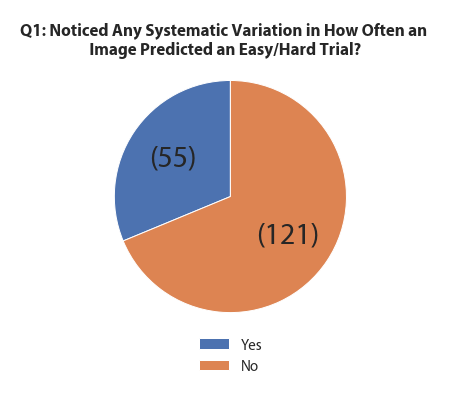

In [104]:
fig, ax1 = plt.subplots(figsize=(8, 7));
Q1 = [posttest.Q1_SC_SystematicVariation[posttest.Q1_SC_SystematicVariation == 1].count(), posttest.Q1_SC_SystematicVariation[posttest.Q1_SC_SystematicVariation == 0].count()];
Q1labels = ['Yes','No'];
plt.axis('equal');
startanglept=90;
radiussize=0.65;
legendfontsize=15;
titlefontsize=17;

patches, texts, junk = ax1.pie(Q1, startangle=startanglept, radius=radiussize, autopct=make_autopct(Q1));
ax1.legend(patches, Q1labels, loc='lower center', fontsize=legendfontsize, frameon=False);
fig.suptitle('Q1: Noticed Any Systematic Variation in How Often an\n Image Predicted an Easy/Hard Trial?', fontsize=titlefontsize,fontweight="bold", y = 0.85);
plb.savefig(figurepath+"posttestQ1_SC.png", bbox_inches='tight');

#### Next, we asked participants to rate how likely certain images would together predict the frequency of easy/congruent and hard/incongruent trials on a scale from 0 (never) to 100 (always). 

For instance, were the bear and bird paired together? Bear and deer? Bear and turtle?

Were any of the image category pairings rated as more predictive or nonpredictive than chance (50%)?

In [105]:
stats.ttest_1samp(posttest.Q2_BearTurtle.dropna(),50)

Ttest_1sampResult(statistic=0.08587469678113853, pvalue=0.9316740680352303)

In [106]:
stats.ttest_1samp(posttest.Q2_BearBird.dropna(),50)

Ttest_1sampResult(statistic=0.316913687741244, pvalue=0.7517248216803045)

In [107]:
stats.ttest_1samp(posttest.Q2_BearDeer.dropna(),50)

Ttest_1sampResult(statistic=1.8008334101748664, pvalue=0.07364852292833958)

In versions 1 and 7, the bear and turtle were paired together (as the mostly congruent context).
In versions 2 and 8, the bear and deer were paired together (as the mostly congruent context).
In versions 3 and 9, the bear and turtle were paired together (as the mostly incongruent context).
In versions 4 and 10, the bear and deer were paired together (as the mostly incongruent context).
In versions 5 and 11, the bear and bird were paired together (as the mostly congruent context).
In versions 6 and 12, the bear and bird were paired together (as the mostly incongruent context).

In [108]:
posttest['Group'] = posttest['version'].isin([1,2,3,4])
posttest.loc[posttest['version'].isin([1,7,3,9]),'Group'] = 'BearTurtle'
posttest.loc[posttest['version'].isin([2,8,4,10]),'Group'] = 'BearDeer'
posttest.loc[posttest['version'].isin([5,6,11,12]),'Group'] = 'BearBird'

Does any one group differ in how it rates the image categories? E.g., the "BearDeer" group could rate the bear + deer clustering as more predictive than the other 2 groups.

In [109]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod_BT = ols('Q2_BearTurtle ~ Group',
                data=posttest).fit()
                
aov_table_BT = sm.stats.anova_lm(mod_BT, typ=2)
print(aov_table_BT)

                sum_sq     df         F   PR(>F)
Group       559.505064    2.0  0.621003  0.53872
Residual  70726.188686  157.0       NaN      NaN


In [110]:
posttest.groupby(['Group'])['Q2_BearTurtle'].mean()

Group
BearBird      47.603774
BearDeer      50.711538
BearTurtle    52.054545
Name: Q2_BearTurtle, dtype: float64

In [111]:
mod_BB = ols('Q2_BearBird ~ Group',
                data=posttest).fit()
                
aov_table_BB = sm.stats.anova_lm(mod_BB, typ=2)
print(aov_table_BB)

                sum_sq     df       F    PR(>F)
Group      2427.414498    2.0  2.6296  0.075282
Residual  72464.279252  157.0     NaN       NaN


In [112]:
posttest.groupby(['Group'])['Q2_BearBird'].mean()

Group
BearBird      45.301887
BearDeer      54.711538
BearTurtle    51.654545
Name: Q2_BearBird, dtype: float64

In [113]:
mod_BD = ols('Q2_BearDeer ~ Group',
                data=posttest).fit()
                
aov_table_BD = sm.stats.anova_lm(mod_BD, typ=2)
print(aov_table_BD)

                sum_sq     df         F   PR(>F)
Group       319.606888    2.0  0.302451  0.73944
Residual  81896.139947  155.0       NaN      NaN


In [114]:
posttest.groupby(['Group'])['Q2_BearDeer'].mean()

Group
BearBird      54.849057
BearDeer      51.372549
BearTurtle    53.537037
Name: Q2_BearDeer, dtype: float64

In [115]:
GRP_BT = posttest.groupby(['subjID'])['Q2_BearTurtle'].mean()
GRP_BTSEM = pd.Series.std(GRP_BT.dropna()) / sqrt(len(GRP_BT.dropna()))
GRP_BB = posttest.groupby(['subjID'])['Q2_BearBird'].mean()
GRP_BBSEM = pd.Series.std(GRP_BB.dropna()) / sqrt(len(GRP_BB.dropna()))
GRP_BD = posttest.groupby(['subjID'])['Q2_BearDeer'].mean()
GRP_BDSEM = pd.Series.std(GRP_BD.dropna()) / sqrt(len(GRP_BD.dropna()))

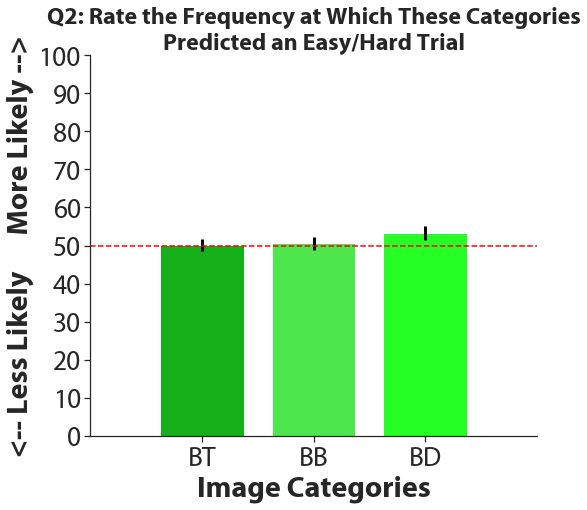

In [116]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(8, 7));
plt.plot([0,1,2,3,4],[50,50,50,50,50], 'r--');
rects1 = ax.bar(1,GRP_BT.dropna().mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=GRP_BTSEM,ecolor='k',error_kw=dict(lw=3));
rects2 = ax.bar(2,GRP_BB.dropna().mean(),barwidth,color=(0.3,0.9,0.3),yerr=GRP_BBSEM,ecolor='k',error_kw=dict(lw=3));
rects3 = ax.bar(3,GRP_BD.dropna().mean(),barwidth,color=(0.15,1,0.15),yerr=GRP_BDSEM,ecolor='k',error_kw=dict(lw=3));
ax.set_ylim(0,100);
ax.set_xlim(0,4);
ax.set_xticklabels(('BT','BB','BD'));
ax.set_xticks([1, 2, 3]);
ax.set_yticks(np.arange(0, 101, 10));
plt.title('Q2: Rate the Frequency at Which These Categories\nPredicted an Easy/Hard Trial', fontsize=24,fontweight="bold");
plt.ylabel('<-- Less Likely      More Likely -->', fontweight="bold");
plt.xlabel('Image Categories',fontweight="bold");
sns.despine();

plb.savefig(figurepath+"posttestQ2.png", bbox_inches='tight');

#### Participants were then asked to match the images to the Stroop trial type that they most likely predicted. Did they perform better than chance (i.e., 2/4 cue-demand relationships correctly matched)? They were asked this for both the main task ISPC items (SC_ForcedChoice) and the transfer task items (SCT_ForcedChoice). We can then compare their performance matching between the transfer items (which were nonpredictive) and the main task items (which were predictive).

In [117]:
stats.ttest_1samp(posttest.Q3_SC_ForcedChoicePerformance.dropna(),2)

Ttest_1sampResult(statistic=-4.550252181608552, pvalue=1.0543060610537685e-05)

In [118]:
stats.ttest_1samp(posttest.Q3_SCT_ForcedChoicePerformance.dropna(),2)

Ttest_1sampResult(statistic=-2.3851440431489994, pvalue=0.018242403894646802)

In [119]:
ttest = stats.ttest_rel(posttest.Q3_SC_ForcedChoicePerformance.dropna(), posttest.Q3_SCT_ForcedChoicePerformance.dropna())
d = cohen_d(posttest.Q3_SC_ForcedChoicePerformance.dropna(), posttest.Q3_SCT_ForcedChoicePerformance.dropna())
ttest, d

(Ttest_relResult(statistic=-1.4394693717033622, pvalue=0.15197116073373562),
 -0.1384376024362664)

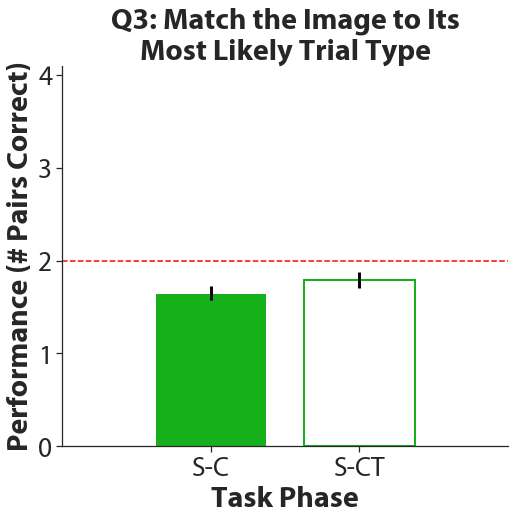

In [120]:
SCFC = posttest.groupby(['subjID'])['Q3_SC_ForcedChoicePerformance'].mean();
SCFCSEM = pd.Series.std(SCFC.dropna()) / sqrt(len(SCFC.dropna()));
SCTFC = posttest.groupby(['subjID'])['Q3_SCT_ForcedChoicePerformance'].mean();
SCTFCSEM = pd.Series.std(SCTFC.dropna()) / sqrt(len(SCTFC.dropna()));

barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(8, 7));
rects1 = ax.bar(1,SCFC.dropna().mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=SCFCSEM,ecolor='k',error_kw=dict(lw=3));
rects4 = ax.bar(2,SCTFC.dropna().mean(),barwidth,yerr=SCTFCSEM,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2,facecolor='none', error_kw=dict(lw=3));
ax.set_ylim(0,4.1);
ax.set_xlim(0,3);
plt.plot([0,1,2,3],[2,2,2,2], 'r--');
ax.set_xticklabels(('S-C','S-CT'));
ax.set_xticks([1, 2]);
ax.set_yticks(np.arange(0, 5, 1));
plt.title('Q3: Match the Image to Its\nMost Likely Trial Type', fontweight="bold");
plt.ylabel('Performance (# Pairs Correct)', fontweight="bold");
plt.xlabel('Task Phase', fontweight="bold");
sns.despine();

plb.savefig(figurepath+"posttestQ3.png", bbox_inches='tight');

# Exploratory Analysis of the Congruency Sequence Effect

This experiment was primarily designed to look at the effects of performance feedback on the ISPC. Here, this is just me satisfying my curiosity with an exploratory analysis of the CSE.

The CSE is also theorized to be sensitive to reward (Abrahamse et al., 2016). Thus, although the trial design is limited (not all the trial types have equal percentages), we can somewhat assess the effects of FB on the CSE.

In [121]:
rdat = dat.query('(TypeOfResponse != "SCRespITI") & (RT > 200) & (RT < 1000) & (Accuracy != 0) & (StimRep != 1) & (TrialCounter != 1)').copy()
acdat = dat.query('(TrialCounter != 1)').copy()

In [122]:
dataframes = [rdat, acdat];

for df in dataframes:
    df['Feedback'] = df['Version'].isin([7,8,9,10,11,12])
    df.loc[df['Version'].isin([7,8,9,10,11,12]), 'Feedback'] = 'Feedback'
    df.loc[df['Version'].isin([1,2,3,4,5,6]), 'Feedback'] = 'NoFeedback'
    
    df['Transfer'] = df['RunCounter'].isin([4])
    df.loc[df['RunCounter'].isin([1,2,3]), 'Transfer'] = 'MainTask'
    df.loc[df['RunCounter'].isin([4]), 'Transfer'] = 'TransferTask'

    df['Congruency'] = df['TrialType'].isin([1])
    df.loc[df['TrialType'].isin([0]),'Congruency'] = 'Incongruent'
    df.loc[df['TrialType'].isin([1]),'Congruency'] = 'Congruent'
    
    df['PrevCong'] = df['Prevtrial'].isin([1])
    df.loc[df['Prevtrial'].isin([1]),'PrevCong'] = 'Incongruent'
    df.loc[~df['Prevtrial'].isin([1]),'PrevCong'] = 'Congruent'
    
    df['CSE'] = df['Sequential'].isin([1])
    df.loc[df['Sequential'].isin([1]),'CSE'] = 'Cong-Cong'
    df.loc[df['Sequential'].isin([2]),'CSE'] = 'Incong-Cong'
    df.loc[df['Sequential'].isin([3]),'CSE'] = 'Cong-Incong'
    df.loc[df['Sequential'].isin([4]),'CSE'] = 'Incong-Incong'

Let's take a peak at the means...

In [123]:
mean_cueing_effect(rdat, 'RT', 'Feedback', 'MainTask',0)

(CSE
 Cong-Cong        648.258299
 Cong-Incong      656.051648
 Incong-Cong      649.012204
 Incong-Incong    658.736170
 Name: RT, dtype: float64, CSE
 Cong-Cong        3.725209
 Cong-Incong      3.526121
 Incong-Cong      3.566373
 Incong-Incong    3.537445
 Name: RT, dtype: float64)

In [124]:
mean_cueing_effect(rdat, 'RT', 'NoFeedback', 'MainTask',0)

(CSE
 Cong-Cong        637.485274
 Cong-Incong      644.579500
 Incong-Cong      636.114804
 Incong-Incong    644.821500
 Name: RT, dtype: float64, CSE
 Cong-Cong        3.547148
 Cong-Incong      3.414088
 Incong-Cong      3.504581
 Incong-Incong    3.464688
 Name: RT, dtype: float64)

In [125]:
mean_cueing_effect(acdat, 'Accuracy', 'Feedback', 'MainTask',0)

(CSE
 Cong-Cong        0.922130
 Cong-Incong      0.910663
 Incong-Cong      0.921209
 Incong-Incong    0.908560
 Name: Accuracy, dtype: float64, CSE
 Cong-Cong        0.003633
 Cong-Incong      0.003923
 Incong-Cong      0.003390
 Incong-Incong    0.004097
 Name: Accuracy, dtype: float64)

In [126]:
mean_cueing_effect(acdat, 'Accuracy', 'NoFeedback', 'MainTask',0)

(CSE
 Cong-Cong        0.929612
 Cong-Incong      0.908221
 Incong-Cong      0.925030
 Incong-Incong    0.911744
 Name: Accuracy, dtype: float64, CSE
 Cong-Cong        0.003339
 Cong-Incong      0.004061
 Incong-Cong      0.003532
 Incong-Incong    0.004482
 Name: Accuracy, dtype: float64)

What about transfer?

In [127]:
mean_cueing_effect(rdat, 'RT', 'Feedback', 'TransferTask',0)

(CSE
 Cong-Cong        648.921009
 Cong-Incong      642.492022
 Incong-Cong      637.499000
 Incong-Incong    652.926057
 Name: RT, dtype: float64, CSE
 Cong-Cong        3.892039
 Cong-Incong      3.664396
 Incong-Cong      3.781021
 Incong-Incong    3.752343
 Name: RT, dtype: float64)

In [128]:
mean_cueing_effect(rdat, 'RT', 'NoFeedback', 'TransferTask',0)

(CSE
 Cong-Cong        629.649837
 Cong-Incong      625.235798
 Incong-Cong      619.371073
 Incong-Incong    637.476607
 Name: RT, dtype: float64, CSE
 Cong-Cong        3.484681
 Cong-Incong      3.441902
 Incong-Cong      3.522609
 Incong-Incong    3.432707
 Name: RT, dtype: float64)

In [129]:
mean_cueing_effect(acdat, 'Accuracy', 'Feedback', 'TransferTask',0)

(CSE
 Cong-Cong        0.911078
 Cong-Incong      0.921932
 Incong-Cong      0.929034
 Incong-Incong    0.907064
 Name: Accuracy, dtype: float64, CSE
 Cong-Cong        0.004747
 Cong-Incong      0.005150
 Incong-Cong      0.004267
 Incong-Incong    0.005239
 Name: Accuracy, dtype: float64)

In [130]:
mean_cueing_effect(acdat, 'Accuracy', 'NoFeedback', 'TransferTask',0)

(CSE
 Cong-Cong        0.925459
 Cong-Incong      0.936590
 Incong-Cong      0.942188
 Incong-Incong    0.914243
 Name: Accuracy, dtype: float64, CSE
 Cong-Cong        0.003556
 Cong-Incong      0.003729
 Incong-Cong      0.003918
 Incong-Incong    0.003982
 Name: Accuracy, dtype: float64)

OK, let's actually analyze the main task data... Note that there aren't enough trials for transfer analysis.
(Also why this is so exploratory - again the expt was not designed for this.)

In [127]:
%cd csvdata

C:\Users\cb383\Desktop\YearThree\controllearning\fbproject\Ispc_combined\data\csvdata


In [133]:
CSE_RT = rdat.loc[rdat['Transfer'] == 'MainTask'].groupby(['subject','Feedback','PrevCong','Congruency', "Experiment"])['RT'].mean().reset_index();
CSE_ACC = acdat.loc[acdat['Transfer'] == 'MainTask'].groupby(['subject','Feedback','PrevCong','Congruency', "Experiment"])['Accuracy'].mean().reset_index();

CSE_RT_T = rdat.loc[rdat['Transfer'] == 'TransferTask'].groupby(['subject','Feedback','PrevCong','Congruency', "Experiment"])['RT'].mean().reset_index();
CSE_ACC_T = acdat.loc[acdat['Transfer'] == 'TransferTask'].groupby(['subject','Feedback','PrevCong','Congruency', "Experiment"])['Accuracy'].mean().reset_index();

#create tidy data csvs
CSE_RT.to_csv(csvpath+'CSE_ANOVA_RT.csv')
CSE_ACC.to_csv(csvpath+'CSE_ANOVA_ACC.csv')
CSE_RT_T.to_csv(csvpath+'CSE_ANOVA_RT_T.csv')
CSE_ACC_T.to_csv(csvpath+'CSE_ANOVA_ACC_T.csv')

In [129]:
%%writefile CSEAnova.R

install.packages("afex",repos='https://mirrors.nics.utk.edu/cran/')
library(afex)

CSE_RT <- read.csv('CSE_ANOVA_RT.csv')
aov_car(RT ~ Feedback * Experiment + Error(subject/(PrevCong*Congruency)), data = CSE_RT, anova_table = list(es = "pes"))

#

CSE_ACC <- read.csv('CSE_ANOVA_ACC.csv')
aov_car(Accuracy ~ Feedback * Experiment + Error(subject/(PrevCong*Congruency)), data = CSE_ACC, anova_table = list(es = "pes"))

Overwriting CSEAnova.R


In [130]:
! Rscript CSEAnova.R

Warning message:
package 'afex' is not available (for R version 3.4.3) 
Error in library(afex) : there is no package called 'afex'
Execution halted


Let's look at the graphs...

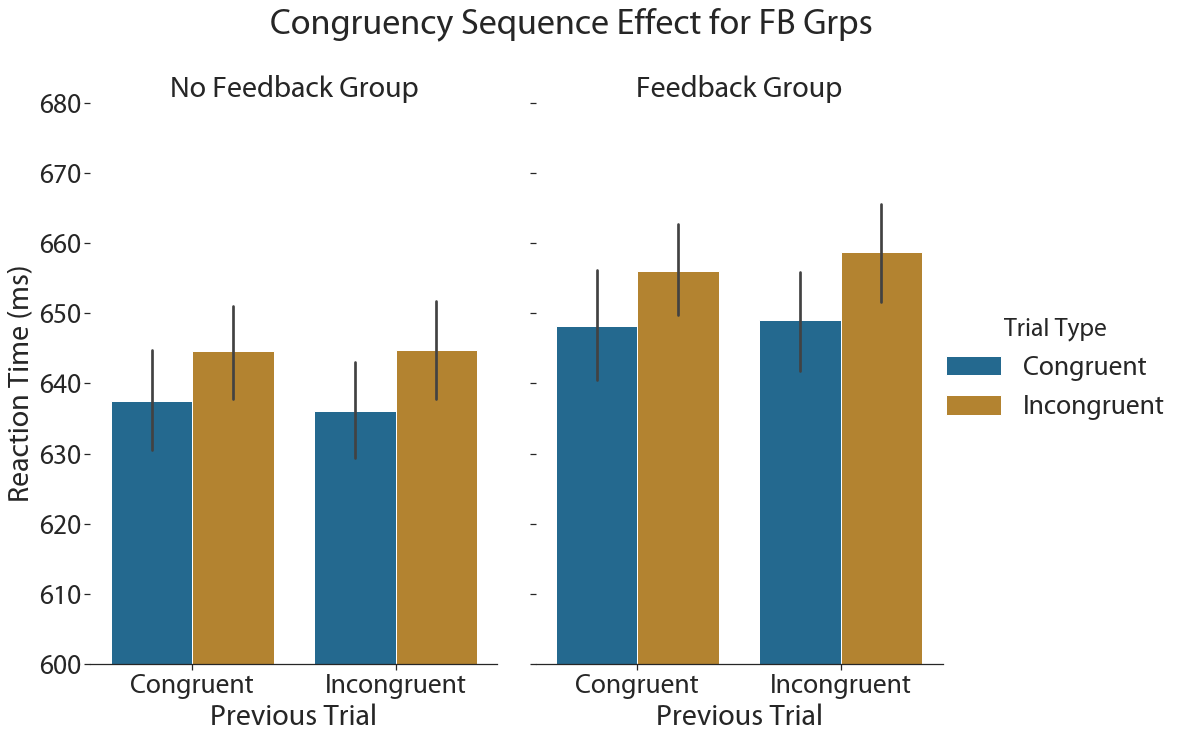

In [134]:
mybargraph("PrevCong","RT","Congruency","Feedback",["Congruent", "Incongruent"],CSE_RT,"Previous Trial","Reaction Time (ms)","Congruency Sequence Effect for FB Grps","Trial Type",600,680,"CSE_RT.png",10)

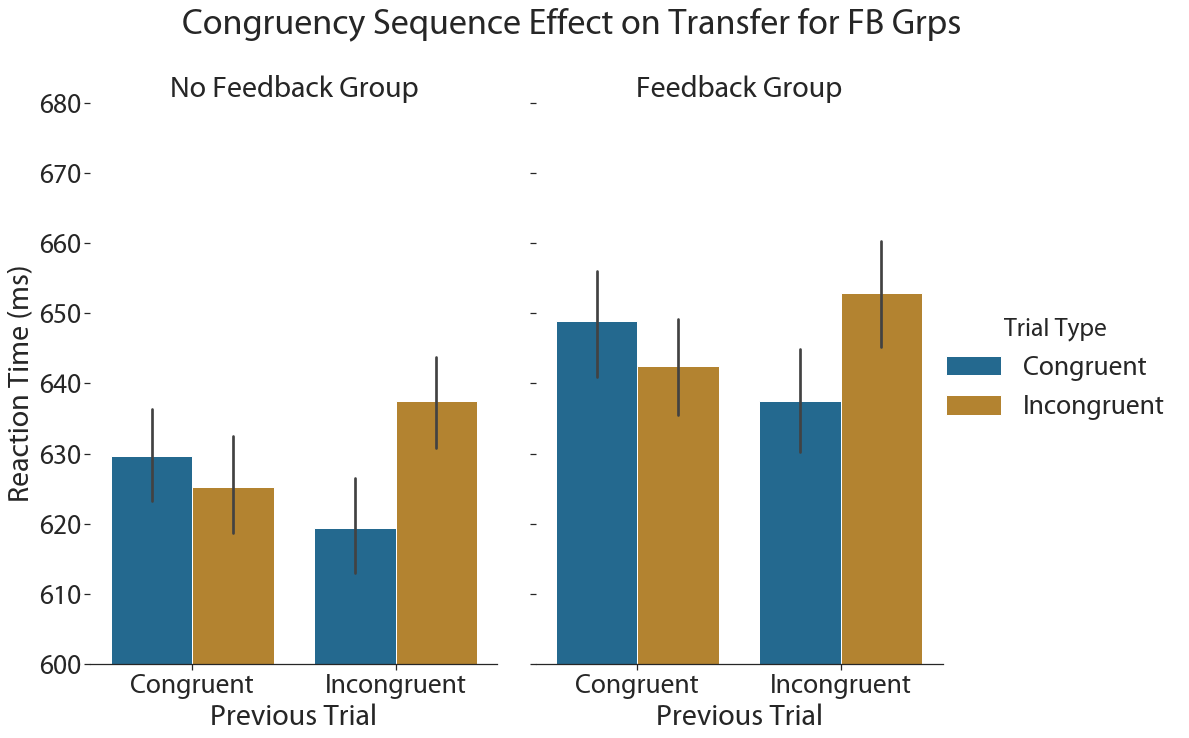

In [135]:
mybargraph("PrevCong","RT","Congruency","Feedback",["Congruent", "Incongruent"],CSE_RT_T,"Previous Trial","Reaction Time (ms)","Congruency Sequence Effect on Transfer for FB Grps","Trial Type",600,680,"CSE_RT_T.png",10)

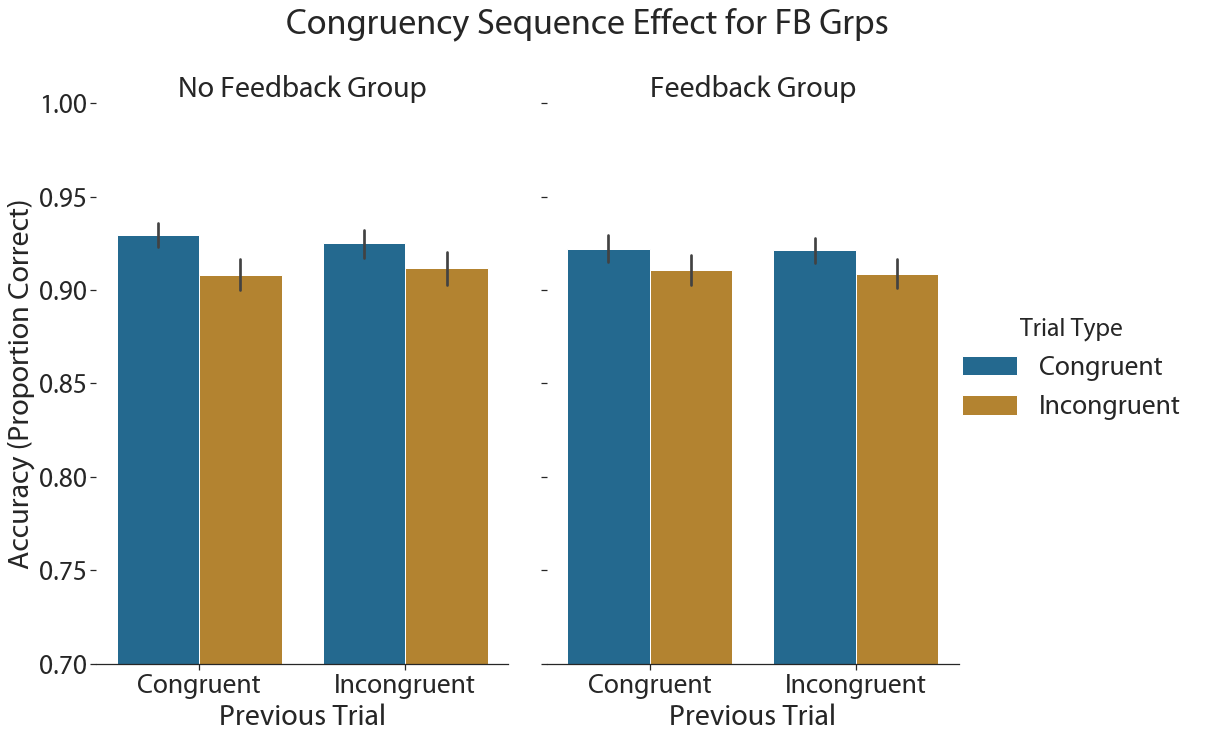

In [136]:
mybargraph("PrevCong","Accuracy","Congruency","Feedback",["Congruent", "Incongruent"],CSE_ACC,"Previous Trial","Accuracy (Proportion Correct)","Congruency Sequence Effect for FB Grps","Trial Type",0.7,1.0,"CSE_ACC.png",0.05)

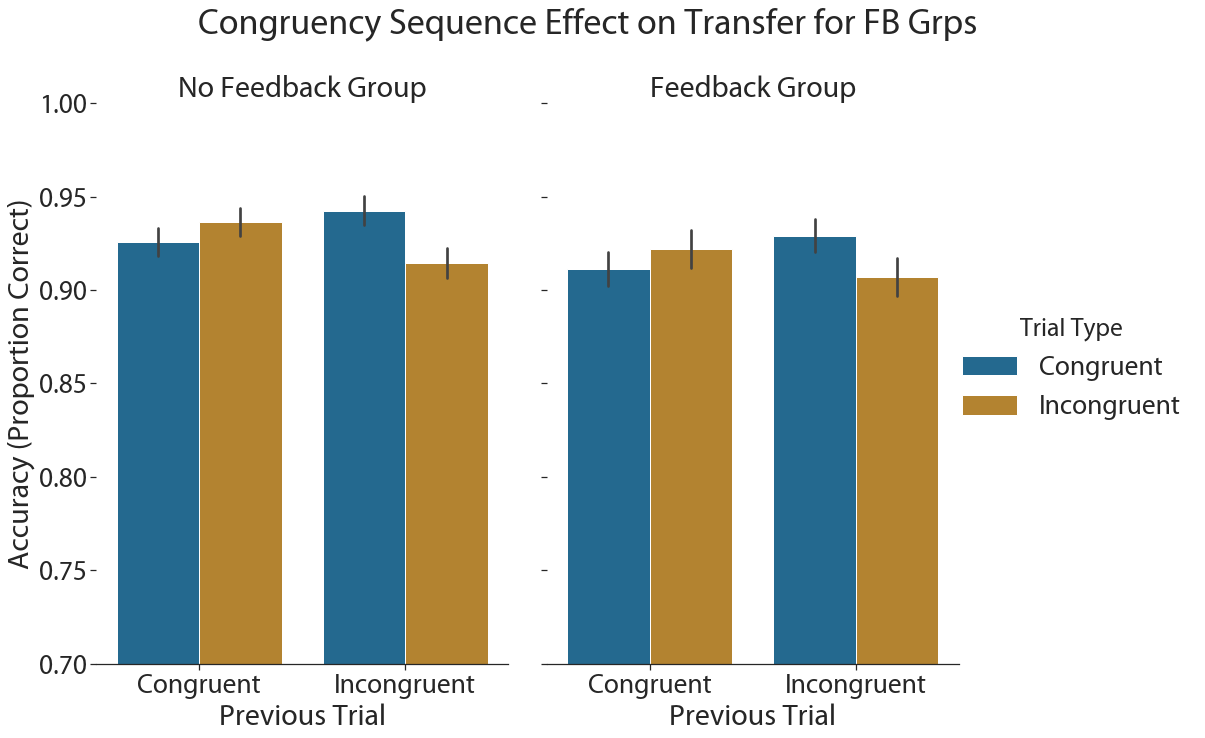

In [137]:
mybargraph("PrevCong","Accuracy","Congruency","Feedback",["Congruent", "Incongruent"],CSE_ACC_T,"Previous Trial","Accuracy (Proportion Correct)","Congruency Sequence Effect on Transfer for FB Grps","Trial Type",0.7,1.0,"CSE_ACC_T.png",0.05)